# <h1 style="color:orange">Libraries</h1> 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                             # Shapiro Test
import statsmodels.graphics.tsaplots as sgt                 # Autocorrelation plots
import statsmodels.api as sm
import qda
import seaborn as sns
import math
from scipy import stats
import scipy.special as sp
from statsmodels.tsa.stattools import acf                   # Autocorrelation function
from statsmodels.stats.diagnostic import acorr_ljungbox     # for LBQ test
from statsmodels.sandbox.stats.runs import runstest_1samp   # Runs Test
from sklearn.decomposition import PCA                       # Import the libraries for PCA
from scipy.stats import norm
from scipy.stats import shapiro





## Introduction to `numpy`

-> It provides a powerful array object, as well as a variety of functions for working with arrays, such as mathematical operations, and linear algebra. The main advantages of using Numpy are its speed, convenience, and compatibility with other scientific libraries.


In [8]:
# Import the libraries
import numpy as np

Create arrays using the `np.array()` function.

In [9]:
# Creating a one-dimensional array
a = np.array([1, 2, 3, 4])
print('a =', a)

# Creating a two-dimensional array
b = np.array([[1, 2], [3, 4]])
print('b = ', b)

a = [1 2 3 4]
b =  [[1 2]
 [3 4]]


Access individual elements of an array using brackets `[]`. Remind: elements are numbered starting from `0`.

In [10]:
print('first element of a is: ', a[0])

print('element in position [0,1] of b is: ', b[0,1])

print('the first column of b is: ', b[:,0])

print('the second row of b is: ', b[1,:])

first element of a is:  1
element in position [0,1] of b is:  2
the first column of b is:  [1 3]
the second row of b is:  [3 4]


We can use `np.arange(start, stop, step)` function to create an evenly spaced array of values within a given range: 
- `start` is the first value of the array
- `stop` is the last value of the array (the array will not include this value)
- `step` is the difference between each value in the array (default is 1)

Or, if you are not interested in a specific step size and you just want to evenly cover a range with `n` values, you can use `np.linspace(start, stop, n)` function. 

In [11]:
c = np.arange(-5, 5, 1)
print('c = ', c)

d = np.linspace(-5, 5, 11)
print('d = ', d)

c =  [-5 -4 -3 -2 -1  0  1  2  3  4]
d =  [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


## Introduction to `pandas`

-> It provides data structures such as Series (1-dimensional) and DataFrame (2-dimensional) for storing and manipulating data.

-> Use to import the CSV files for all our exercise classes.

In [12]:
import pandas as pd

-> `read_csv()`: to load a CSV file into a DataFrame.

In [ ]:
# Loading a CSV file into a DataFrame
df = pd.read_csv('ESE2_ex5.csv')

-> `head()`: to display the first n rows of a DataFrame.

In [ ]:
# Display the first 3 rows of a DataFrame
df.head(3)

-> `loc[]`: modify individual cells in the DataFrame.

    -> For example, let's change the value in the first row and first column of the DataFrame and set it to `20.0`.

In [ ]:
# Change the value of a cell
df.loc[0,'cond1'] = 20.0

# See if the change was made
df.head()

-> `loc[]`: search for specific values in the DataFrame. 

        -> For example, let's change the value in the first column that is equal to `17.6` and set it to `17.0`.

In [ ]:
# Find the row equal to 17.6 value in the first column and change the value to 17.0
df.loc[df['cond1'] == 17.6, 'cond1'] = 17.0

# See if the change was made
df.head()


-> `loc[]`: find the index of the maximum value in a column. 
    
    For example, let's find the index of the maximum value in the first column and set it to `20.1`.

In [ ]:
# Find the row with the maximum value in a column and change the value
df.loc[df['cond1'].idxmax(), 'cond1'] = 20.1

# See if the change was made
df.head()

## Graphical representation: introduction to `matplotlib`

Matplotlib is a powerful library for creating static, animated, and interactive data visualizations in Python. 

To use Matplotlib, we first need to import it.

In [ ]:
import matplotlib.pyplot as plt

The most basic function in Matplotlib is the `plot()` function, which is used to create a line plot of data. For example:

In [ ]:
# Plot the two variables in the dataframe 'df' versus time order

# variable 1
plt.plot(df['cond1'])

# Show the plot
plt.show()

# variable 2
plt.plot(df['cond2'])

# Show the plot
plt.show()

In [ ]:
# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a line plot
plt.plot(x, y)

# Show the plot
plt.show()

This will create a line plot of `y` versus `x`.

In addition to line plots, Matplotlib also provides a wide range of other plot types, such as scatter plots, bar plots, histograms, and more. For example:

In [ ]:
# Create a scatter plot
plt.scatter(df['cond1'], df['cond2'])

# Show the plot
plt.show()

Let's generate a bigger dataset. We can draw random numbers from a given distribution (e.g., a normal distribution)
Note: probability distributions will be discussed later on

In [ ]:
# Generate a random array of 1000 elements from a normal distribution
np.random.seed(0) # setting the seed for random generator
mu = 10           # mean
sigma = 2.5       # standard deviation
y = np.random.normal(mu, sigma, 1000) # We re generating a population of 1000 elements with µ=10 sigma =2.5

Let's plot the histogram of the random data

In [ ]:
# Create a histogram
plt.hist(y)

# Show the plot
plt.show()

In [ ]:
# Create a histogram with a given number of bins
plt.hist(y,bins=20) 
# If we set the bin too high => we have low value bins

# Show the plot
plt.show()

Hint: Choosing the number of bins approximately equal to the square root of the number of observations often works well in practise

There are several options within these basic functions that will allow you to improve data visualization. \
Each type of plot have both common parameters, e.g.
- `color` to set the color of the line. 
- `marker` to choose the marker of the datapoint. 
- `label` to assign a name to the curve that will be shown in the legend (`legend()`). 

Here's a more complex example of line plot with two samples. 

In [ ]:
# Create some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a line plot
plt.plot(x, y1, color='blue', label='sin(x)')
plt.plot(x, y2, color='red', marker='o', label='cos(x)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Other parameters, specific to the type of plot (e.g., the number of `bins`, or the probability `density` rather than the raw count in the histogram), can be found in the documentation. 

In [ ]:
# Generate a random array of 1000 elements from a normal distribution
y1 = np.random.normal(mu, sigma, 1000)
y2 = np.random.normal(mu+8, sigma, 1000)

# Create a histogram
plt.hist(y1, bins=20, alpha=0.5, label='y1')
plt.hist(y2, bins=20, alpha=0.5, label='y2')
plt.legend()

# Show the plot
plt.show()

The plot itself can be further customized by:
- adding a title (`title()`)
- assigning labels to each axis (`xlabel()` and `ylabel()`)
- changing axis limits (`xlim()` and `ylim()`)
- showing the legend (`legend()`)
- adding text in a specific location (`text()`)

In [ ]:
# Create some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a line plot
plt.plot(x, y1, color='blue', label='sin(x)')
plt.plot(x, y2, color='red', marker='o', label='cos(x)')

# Add a legend and title
plt.legend()
plt.title('Plot of sin(x) and cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 7)
plt.ylim(0, 1.5)

# Add text to call out a specific point
plt.text(np.pi/2, 1.05, 'sin(x) local maximum', size=12, ha='left')
plt.scatter(np.pi/2, 1, color='blue', marker='X', s=200)


# Show the plot
plt.show()

In [ ]:
# This plot is the same as before, but now we're zooming and creating notes


![Slide17.PNG](attachment:Slide17.PNG)

The `describe()` function is used to generate summary statistics of the numerical columns of the DataFrame.

In [ ]:
# Generate summary statistics for the dataframe 'df'
df.describe()

Or you can access individual descriptive statistics such as `mean()`, `stdev()`, or `var()`. 

In [ ]:
# Calculate the mean of a column
df['cond1'].mean()

Numpy integrates the functions to compute the most common descriptive statistics: 
- `mean()`  mean
- `std()`   standard deviation
- `var()`   variance
- `min()`   minimum
- `max()`   maximum
- `median()`    median
- `percentile()`    for computing any percentile or quartiles (Q1 = 25 percentile, Q3 = 75 percentile)


In [ ]:
print("Mean:\t %.3f" % np.mean(df['cond1']))
print("StDev:\t %.3f" % np.std(df['cond1'], ddof=1))  # We're taking the 1° column of the datagrame. ddof = 1 :degree of freedom, for definition std deviation has -1 to the denominator.
print("Var:\t %.3f" % np.var(df['cond1']))            # ddof not needed in this case
print("Min:\t %.3f" % np.min(df['cond1']))
print("Q1:\t %.3f" % np.percentile(df['cond1'], 25))
print("Median:\t %.3f" % np.median(df['cond1']))
print("Q3:\t %.3f" % np.percentile(df['cond1'], 75))
print("Max:\t %.3f" % np.max(df['cond1']))

Another graphical tool to describe variation: Boxplot

In [ ]:
# Boxplot of the random data drawn from the normal distribution
#plt.boxplot(y)
#plt.boxplot(y1)
y1 = np.random.normal(mu, sigma, 1000)
y2 = np.random.normal(mu+8, sigma, 1000)
plt.boxplot([y1,y2]) # comparing y1 e y2


# Show the plot
plt.show()

The boxplot:

![Slide19.PNG](attachment:Slide19.PNG)

We can also perform mathematical operations on arrays, such as addition, subtraction, multiplication, and division. We will see more complex functions later on. 

## Introduction to `scipy.stats`


Scipy is a python library that is widely used for scientific and technical computing. The `stats` module in scipy is used for probability distributions and statistical functions. In this tutorial, we will learn about the basic functions in scipy.stats.

### Probability Distribution Functions
scipy.stats has a wide range of probability distributions that can be used for statistical analysis. Some of the commonly used distributions are:
- Normal Distribution (`norm`)
- t-Student (`t`)
- Chi-squared (`chi2`)
- F (`f`)
- etc.

To use a probability distribution function, we first need to import the stats module from scipy.

In [ ]:
from scipy import stats

We can inspect everything we want from a distribution function using the following commands: 
- Probability density function (`stats.*distribution_name*.pdf()`)
- Cumulative density function (`stats.*distribution_name*.cdf()`)
- Point probability function (or inverse cumulative probability) (`stats.*distribution_name*.ppf()`)

Let's use `stats.norm.pdf()` to plot a Normal distribution. 

In [ ]:
# Plot the probability distribution function of a normal distribution
x = np.linspace(-3, 3, 100) 
mu = 0
sigma = 1
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y)
plt.show()

The function takes in input the points where you want to evaluate the function `x` and the parameters of the distribution (in this case, the mean `mu` and the StDev `sigma`).

We can graphically represent areas under the 'pdf' and compute the corresponding probability

In [ ]:
# Plot the cumulative distribution function of a normal distribution
plt.plot(x, y)

# Adding Title, Labels and Grid
plt.title("Normal Distribution, mu = %d, sigma = %.3f" % (mu, sigma))
plt.xlabel("Values")
plt.ylabel("Probability Density")
plt.grid(True)

# Filling the Probability Area that Z < z_0
z_0 = -1
x_fill = np.linspace(np.min(x), z_0, 100)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5)    #alpha is the transparency factor of the shaded area

# Showing Plot
plt.show()

Let's compute the probability corresponding to the shaded area

In [ ]:
#calculate the cumulative normal of z_0
z_0 = -1
# p1 = stats.norm.cdf(z_0)

p1 = stats.norm.cdf(z_0, 0, 5)

print("z_0 = %.6f" % z_0)
print("Cumulative normal of z_0 = %.6f" % p1)

Let's use `stats.norm.cdf()` to plot a Normal cumulative density function. 

In [ ]:
# Plot the cumulative density function of a normal distribution
x = np.linspace(-3, 3, 100)
mu = 0
sigma = 1
y = stats.norm.cdf(x, mu, sigma)
plt.plot(x, y)
plt.show()

# <h1 style="color:orange">Theory</h1> 

# <h1 style="color:orange">Scripts</h1> 

## Python basic functions

These functions are embedded in Python and do not require importing libraries. 

The `print()` function allows to print out a string or a combination of string and numbers.

In [ ]:
# Import the dataset
data = pd.read_csv('ESE05_ex1.csv', delimiter = ';')

# Print the first 5 rows of the dataset
data.head()

# DEVIDE THE DATASET:
NewDataset = data[data['NameCol']== 'Value']
NewDataset.head(5)

# CREATION ID COLUMN
for i in range(len(data)):
    data.at[i, 'ID'] = i + 1  # Se vuoi che gli ID inizino da 1

# DELETE COLUMN
data.drop('Sample', axis=1, inplace=True)


The printed strings can be also constructed using the appropriate syntax:
- integers `%d`
- float `%f`
- strings `%s`

In [ ]:
# CREATE A VECTOR:
mu = pd.Series({'x1': mu_1, 'x2': mu_2})        # Create the mean vector

S = pd.DataFrame([[var_1, covariance],          # define the covariance matrix as a pandas dataframe
                [covariance, var_2]],
                columns=['x1', 'x2'],
                index=['x1', 'x2'])

In [ ]:
print('Hi, my name is %s and I am %d years old.' % (name, age))


In [ ]:
# Add a column with the sample number
data['t'] = np.arange(1, len(data)+1)

data.head()

In [ ]:
# TRANSPOSE A DATASET into one vertical of one column
data_stack = data.transpose().melt()
# Remove unnecessary columns
data_stack = data_stack.drop('variable', axis=1)
data_stack.head()

In [ ]:
# Reorder the indeces of S to match the order of the columns
# get the names of the columns
cols = S.columns.tolist()

S = S.reindex(columns=cols, index=cols)
print(S)

### Other Functions

In [ ]:
# Make a copy of data to avoid changing the original data
data_corrected = data.copy()

## REPLACE:
    # MAXIMUM VALUE: Replace the maximum value in data_corrected with the value 10.33
    data_corrected.loc[data_corrected['Water content'] == data_corrected['Water content'].max(), 'Water content'] = 10.33
    # SPECIFIC VALUE: Replace the fourth observation in data_corrected_2 with the true value 10.33
    data_corrected_2.loc[3, 'Water content'] = 10.33

### Runs

> Compute the number of Runs

Other in ESE3 part 1

In [ ]:
n=len(data)                                     # Number of points
print("Number of points n = %d" % n) 

mean = data.mean()
print('Mean = %.2f'% mean)                      # Mean of the points

m = np.sum(data > mean)                         # Number of points above the mean
print('Number of points above the mean, m = %d' % m) 
        # m = data[data > mean].count()
        # print('Number of points above the mean, m = %d' % m) 

# PLOT:
plt.plot(data, 'o-')
plt.hlines(mean, 0, n, colors='r', linestyles='dashed')
plt.xlabel('Week')
plt.ylabel('Dollars')

plt.grid()
plt.show()

# Create a new series with the mean subtracted from the original series
new_series = np.array(data - mean).flatten() 
print('new_series = ', new_series)

# Create a new series with the sign of the new series
new_series_sign = np.sign(new_series)

# This series will be 1 when the new series is positive and -1 when it is negative
print('new_series_sign = ', new_series_sign)

# Compute the difference between consecutive elements of the new series
new_series_sign_diff = np.diff(new_series_sign)

# This series will be 0 when the sign doesn't change 
print('new_series_sign_diff = ', new_series_sign_diff)

# Count the number of runs
runs = (np.sum(new_series_sign_diff != 0) + 1)      # Counting number of time when we have no a 0 difference
print('Number of runs = %d' % runs) #number of runs

# Count how many times the sign changes 
runs = (np.sum(np.diff(np.sign(new_series)) != 0) + 1)
print('Number of runs = %d' % runs) #number of runs

#### Expected # of Runs Given a Random Runs Distribution:
Assuming that the runs distribution is random, which is the expected number of runs?

In [ ]:
#Expected number of runs
exp_runs= 2*m*(n-m)/n +1
print('Expected number of runs = %.3f' % exp_runs)

> The expected number of runs, $Y$, is given by the formula:
>
> $$E(Y) =  \frac{2 m (n-m)}{n} +1 $$
>
> Where:
> - $n$ is the number of observations
> - $m$ is the number of observations above the mean

#### Compute the X% of CI given n & m

In [ ]:
# Standard deviation of the number of runs
std_runs = np.sqrt((2*m*(n-m)*(2*m*(n-m)-n)/((n**2)*(n-1))))
print('Standard deviation of runs = %.03f' % std_runs)

#95% confidence interval
conf_int= stats.norm.interval(0.95, loc=exp_runs, scale=std_runs)
print('Confidence interval: (%.3f, %.3f)' % (conf_int[0], conf_int[1]))

Compute the X% CI given n (# of datas) & m (datas upon the mean)

> Standard deviation of $Y$:
> $$ \sqrt{V(Y)} = \sqrt\frac{2m(n-m)[2m(n-m)-n]}{ n^2 (n-1)} $$
> Normal approximation of a Poisson distribution:
> $$ Y \sim N(E(Y), V(Y)) $$
>
> Confidence interval: 
> $$E(Y) \pm z_{\alpha/2} \sqrt{V(Y)}$$

Test the null hypotesis of the observation randomness:

> $H_0$: process is random
>
> $H_1$: process is NOT random
>
> Statistic: 
> $$ Z_{0} = \frac{Y-E(Y)}{\sqrt{V(Y)}}$$
>
> Rejection region:
> $ |Z_{0}| > z_{\alpha/2} $

In [ ]:
# Input data
alpha = 0.05 # significance level
#test statistic
z0 = (runs-exp_runs)/std_runs
z0 = z0.values[0]
print('z0 = %f' % z0)
z_alfa2= stats.norm.ppf(1-alpha/2)
print('z_alfa2 = %f' % z_alfa2)

if abs(z0)>z_alfa2:
  print('The null hypothesis is rejected')
else: 
  print('The null hypothesis is accepted')

> Compute the p-value: 
> $$ P-value = 2 \cdot [1-\Phi(|Z_0|)]$$

In [ ]:
# Remember, it is a two-tailed test, so we need to multiply the p-value by 2
p_value = 2 * (1 - stats.norm.cdf(abs(z0)))
print('p-value = %.3f' % p_value)

> Alternatively, you can use the `runstest_1samp` function directly to compute the test statistic and the associated p-value. 

In [ ]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

stat, pval_runs = runstest_1samp(data['Ex1'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat))
print('Runs test p-value = {:.3f}'.format(pval_runs))

### Random data generation

> Let's generate a sequence of random data from the specified distributions.

In [ ]:
# Generate random data
data_rand_norm = np.random.normal(loc=mean, scale=std_runs, size=n)
plt.plot(data_rand_norm, 'o-')
plt.title('Random sample, normal')
plt.show()

In [ ]:
data_rand_chi2 = np.random.chisquare(df=2, size=n)
plt.plot(data_rand_chi2, 'o-')
plt.title('Random sample, chi2')
plt.show()

In [ ]:

data_rand_t= np.random.standard_t(df=2, size=n)
plt.plot(data_rand_t, 'o-')
plt.title('Random sample, t-student')
plt.show()


In [ ]:
_, pval = runstest_1samp(data_rand_norm, correction=False)
print('Runs test p-value = {:.3f}'.format(pval))

# Statistical Tests:


In [16]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats # Import the library for hypothesis testing scipy


# Increase the plot and font size 
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14

Random Variable:
$$X \sim N(µ,\sigma^{2})$$

#### Cards

In [9]:
# COPUTE FI
z = 1.645
# Compute the CDF value
# phi_value = stats.norm.cdf(z)
phi_value = 0.5 * (1 + sp.erf(z / math.sqrt(2)))
print(f"Phi({z}) = {phi_value}")


Phi(1.645) = 0.9500150944608786


In [21]:
# Given cumulative probability (Phi(z))
phi_value = 1 - 0.9/2
# Compute the z value
z = stats.norm.ppf(phi_value)
print(f"z for Phi({phi_value}) = {z}")

z for Phi(0.55) = 0.12566134685507416


In [ ]:
# From Power to Alpha:
beta = 0.20
z_beta = stats.norm.ppf(1 - beta)
print(f"z for beta = {beta}: {z_beta:.3f}")

# Calculate the non-central parameter
effect_size = 0.5
sample_size = 30
standard_deviation = 1
non_central_param = (effect_size / standard_deviation) * (sample_size**0.5)
# Z value for power
z_power = stats.norm.ppf(0.80)
# Calculate z_alpha
z_alpha = z_power - non_central_param
print(f"z for alpha: {z_alpha:.3f}")

alpha = 1 - stats.norm.cdf(z_alpha)
print(f"alpha: {alpha:.3f}")


#### Normality Hypothesis

In [ ]:
# Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data['NameCol'])   # Test_statistic, p_value = stats.shapiro(Name_array['Name_Column'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-Plot:
stats.probplot(data['NameCol'], dist = 'norm', plot = plt)
plt.show()

##### Anderson-Darling Test:

We use this test to verify the shapiro test:

In [ ]:
def ADpvalue(data):
    """
    This function computes the p-value of the Anderson-Darling test.
    
    Input:
        data: data to be tested
    Output:
        p_value_AD: p-value of the Anderson-Darling test

    """
    anderson = stats.anderson(data, dist='norm')
    # compute the p-value of the Anderson-Darling test
    if anderson.statistic >= 0.6:
        p_value_AD = np.exp(1.2937 - 5.709*anderson.statistic + 0.0186*(anderson.statistic**2))
    elif anderson.statistic >= 0.34:
        p_value_AD = np.exp(0.9177 - 4.279*anderson.statistic - 1.38*(anderson.statistic**2))
    elif anderson.statistic >= 0.2:
        p_value_AD = 1 - np.exp(-8.318 + 42.796*anderson.statistic - 59.938*(anderson.statistic**2))
    else:
        p_value_AD = 1 - np.exp(-13.436 + 101.14*anderson.statistic - 223.73*(anderson.statistic**2))

    return p_value_AD
    
p_value_AD = ADpvalue(data['Water content'])
print('p-value of the Anderson-Darling test: %.3f' % p_value_AD)

## One Side


> ### Solution
> $$Pr(X \leqslant 30) = \phi \biggl(\frac{30-0}{9} \biggl) = \phi(3.3333)$$
> $$P(\bar{X} \geq \mu_0) = P(\frac{\bar{X} - \mu}{\sigma_{\bar{X}}} \geq \frac{\mu_0 - \mu}{\sigma_{\bar{X}}}) = 1 - P(Z \leq \mu_0 - \mu)$$
> $$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} $$

In [17]:
# 1.INPUT DATA
sigma = 9
mu = 0

# 2.CUMULATIVE PROBABILITY of Z1 
z1 = (30-mu)/sigma        # to standardize the variables
    # or Z_0 = (mu0 - mu)/(sigma/np.sqrt(n)) if we've a sample
p1 = stats.norm.cdf(z1)   # no other intputs bcse we already told it that is a standard distribution in the command


print("z1 = %.6f" % z1)
print("Cumulative normal of z1 = %.6f" % p1)

P_late = 1-p1
print("Probability of late delivery = %.6f" % P_late)

z1 = 3.333333
Cumulative normal of z1 = 0.999571
Probability of late delivery = 0.000429


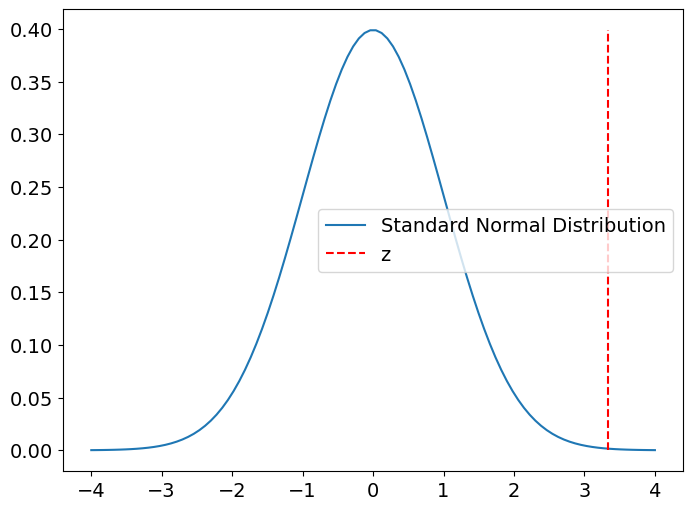

In [18]:
## PLOT:
# 1.Normal Distribution
x = np.linspace (-4, 4, 100) # x is an array of 100 evenly spaced numbers from -4 to 4 inclusive
y = stats.norm.pdf(x, 0, 1) # Computing the Probability Density Function with the mean 0 and std dev 1 at the values specified in the array x
plt.plot(x, y, label='Standard Normal Distribution')

# 2.z value
plt.vlines(z1, 0, np.max(y), color = 'red', linestyles ='dashed', label='z') 

plt.legend()
plt.show()

> The probability of late delivery is:
>
> $$ 1 - P(X \leqslant 30) = 1 - 0.999571 = 0.000429 = 0.0429\% = 429 ppm$$

In [ ]:
#probability in ppm

Pppm = P_late * 1000000
print("Probability of late delivery in ppm = %.0f ppm" % Pppm)

Probability of late delivery in ppm = 429 ppm


### Two Side:


> ### Solution
> $$Pr(-20 \leqslant X \leqslant 10)=Pr(X \leqslant 10)-Pr(X \leqslant-20)$$

In [ ]:
z_a = (-20 - mu)/sigma
z_b = (10 - mu)/sigma

p_a = stats.norm.cdf(z_a)
p_b = stats.norm.cdf(z_b)

prob_b = p_b - p_a

print("Proabbility = %.6f" % prob_b)

> The probability that an item is delivered between 9.40 A.M. and 10.10 A.M. is:

$$Pr(X \leqslant 10)-Pr(X \leqslant-20) = 85.36\%$$

### Mean given Percentile

Value of the mean given the percentile (percentage of items)


In [23]:
#1.Inverse cumulative function of standard normal distribution P = 0.9 (percentile, 90% of items)
z_90 = stats.norm.ppf(0.9)
print("The lower 90%% percentile of the standard normal distribution is z_90 = %.6f" %z_90)

#2.Transform in the normal distribution with µ = 0, std dev = 9
z_90 = z_90*sigma + mu
print("The answer is x_90 = %.6f" % z_90)

The lower 90% percentile of the standard normal distribution is z_90 = 1.281552
The answer is x_90 = 11.533964


> We can expect to have 90% of items delivered at 10:00 A.M. + approx. 11.5 minutes = 10:11:30 A.M.

> Plot:

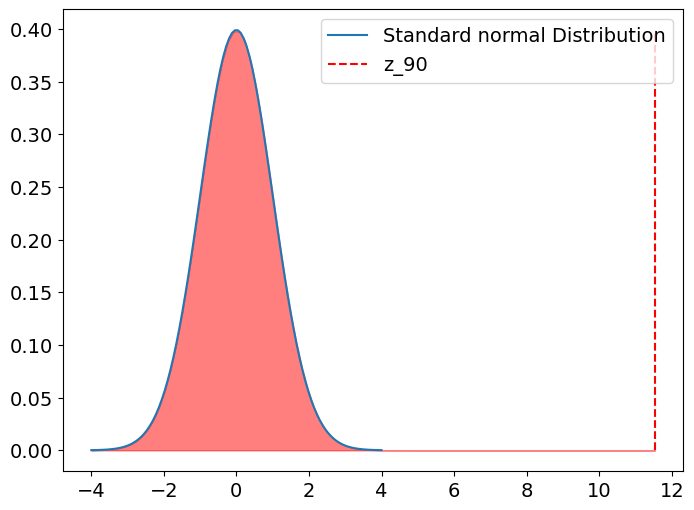

In [22]:
#Plot Normal Distribution
x = np.linspace (-4, 4, 100)
y = stats.norm.pdf (x, 0, 1)
plt.plot(x, y, label ="Standard normal Distribution")

#Plot line
plt.vlines (z_90, 0, np.max(y), color ='red', linestyles='dashed', label='z_90')

#Color the normal distribution
x_fill = np.linspace(-4, z_90, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color = 'red', alpha=0.5)

plt.legend()
plt.show()

### Variation:
#### Sample mean difference
Probability that the sample mean difference between the two samples is Greater than 4

Assuming the two population independent

In [ ]:
# Given mu1, mu2, sigma1, sigma 2
# Compute the mean and the variance of the difference between the two populations
mu_diff = mu1 - mu2 
sigma_diff = np.sqrt(sigma1**2/n1 + sigma2**2/n2)   # the operator ** stands for ^ (i.e., power of)

mu0 = 4       # Difference between the means

# P(X1 - X2 > mu0) = P(Z > (mu0 - mu_diff)/sigma_diff)
prob = 1 - stats.norm.cdf((mu0 - mu_diff)/sigma_diff)

print('Probability of the difference between the means being greater than %.1f is %.4f' % (mu0, prob))

#### Range

Compute the probability that the sample mean difference between the first and the second sample ranges between 3.5 and 5.5 (same assumption).

We can use he following formula to compute the probability:
> $$Pr(3.5 \leq \bar{X}_1 - \bar{X}_2 \leq 5.5) = Pr(\frac{3.5 - 5}{\sqrt{20}} \leq Z \leq \frac{5.5 - 5}{\sqrt{20}}) = Pr(Z \leq \frac{5.5 - 5}{\sqrt{20}}) - Pr(Z \leq \frac{3.5 - 5}{\sqrt{20}})$$


In [ ]:
lower_bound = 3.5      # Lower bound of the interval
upper_bound = 5.5      # Upper bound of the interval

# P(lower_bound < X1 - X2 < upper_bound) = P(X1 - X2 < upper_bound) - P(X1 - X2 < lower_bound)
prob = stats.norm.cdf((upper_bound - mu_diff)/sigma_diff) - stats.norm.cdf((lower_bound - mu_diff)/sigma_diff)

print('Probability of the difference between the means being between %.1f and %.1f is %.4f' % (lower_bound, upper_bound, prob))

## One-Sample Z-Test:

**Assumptions** 
- $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population.
- Population is **normal**.
- The **variance** of the population is **known**. 

Under those assumptions, the quantity $Z$ follows a standard normal distribution $N(0,1)$.
$$ Z = \frac{\bar{X} - \mu}{{\sigma}/{\sqrt{n}}} $$


**Null hypothesis:**
$H_0: \mu = \mu_0$

Where:
- $\mu$ is the population mean
- $\mu_0$ is the hypothesized population mean


**Test statistic:** 
$ Z_0 = \frac{\bar{X} - \mu_0}{{\sigma}/{\sqrt{n}}} $

<center>

| Alternative hypotheses | Rejection criterion |
|----------|----------|
| $H_1: \mu \neq \mu_0$ | $\|Z_0\| > z_{\alpha/2}$|
| $H_1: \mu > \mu_0$ | $Z_0 > z_{\alpha}$|
| $H_1: \mu < \mu_0$ | $Z_0 < -z_{\alpha}$|
</center>

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats     # Import the library for hypothesis testing scipy

# Sample information:
mu = 10                               # mean
sigma = 1                             # standard deviation
n = 10                                # sample size

np.random.seed(230315)                # Generate the random sample
x1 = np.random.normal(mu, sigma, n)

# Run the test
mu0 = 10.1 # Choose the mean of the null hypothesis
Z_0 = (mu - mu0) / (sigma / np.sqrt(n)) # Calculate the Z-statistic
    # If the random sample is used
Z_0 = (np.mean(x1) - mu0) / (sigma / np.sqrt(n)) # Calculate the Z-statistic
print('Test statistic Z_0 = %.3f' % Z_0)

Let's test $H_0$ against $H_1: \mu \neq \mu_0$.

In [ ]:
# Compare the Z-statistic with the critical value
alpha = 0.05                           # Significance level
z_alpha = stats.norm.ppf(1-alpha)      # CRITICAL VALUE, Remind: inverse cumulative distribution function 
                # z_alpha = stats.norm.ppf(1-alpha/2) if two side
print('The critical Value, z_alpha, is: %.3f' % z_alpha)
if np.abs(Z_0) > z_alpha:
    print('Reject the null hypothesis at alpha = %.2f' % alpha)
else:
    print('Accept the null hypothesis at alpha = %.2f' % alpha)


# CONFIDENCE INTERVAL
    # We ve two ways, this is the first
CI = [np.mean(x1) - z_alpha * sigma/np.sqrt(n), np.mean(x1) + z_alpha * sigma/np.sqrt(n)]
    # Or the built-in
CI = stats.norm.interval(1-alpha, loc=np.mean(x1), scale=sigma/np.sqrt(n))
print('Confidence interval: %.3f, %.3f' % (CI[0],CI[1]))

# P-VALUE
pval = 2 * ( 1 - stats.norm.cdf(np.abs(Z_0)) )      # BILATERAL
pval = 1 - stats.norm.cdf(Z_0)                      # UPPER-TAILED
pval = stats.norm.cdf(Z_0)                          # LOWER-TAILED
print('p-value = %.3f' % pval)                      # Greater that the one defitned => Reject H0
if pval < alpha:
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

z_alpha = stats.norm.ppf(1-alpha/2)                # Remind: inverse cumulative distribution function 
print(z_alpha)



### Plot  

In [ ]:
# Plot the normal distribution
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Distribution under H_0')

# Plot the critical region
x_fill = np.linspace(z_alpha, 4, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Critical region')

# Plot the test statistic
plt.vlines(Z_0, 0, np.max(y), color='red', linestyles='dashed', label='Z_0')

# Plot the p-value region and will with a pattern
x_fill = np.linspace(Z_0, 4, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, facecolor='none', alpha=0.5, hatch='xxxx', label='p-value region')
plt.legend()

plt.show()

### Power Curve

We know that the power curve is:
$$power = 1-\beta = 1-\Phi\left(Z_{\alpha/2} - \frac{\delta \sqrt{n}}{\sigma}\right) + \Phi\left(- Z_{\alpha/2} - \frac{\delta \sqrt{n}}{\sigma}\right)$$

where $Z_{\alpha/2}$ is the critical value, $\delta$ is the difference between the hypothesized mean and the true mean, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

probability to refuse whwen there is to refuse


In [ ]:
delta = np.linspace(0, 30, 100)                # We re deviding the space between 0 and 30 in 100 spaces.
mu1 = mu0 + delta
Z_alpha2 = stats.norm.ppf(1 - alpha / 2)

# Compute the power curves for n = 20 and n = 40, those are given number
n = 20
power_20 = 1 - stats.norm.cdf(Z_alpha2 - delta * np.sqrt(n) / sigma) + stats.norm.cdf(-Z_alpha2 - delta * np.sqrt(n) / sigma)
n = 40
power_40 = 1 - stats.norm.cdf(Z_alpha2 - delta * np.sqrt(n) / sigma) + stats.norm.cdf(-Z_alpha2 - delta * np.sqrt(n) / sigma)


# Plot the power curve
plt.plot(delta, power_20, label = "power (n = 20)")
plt.plot(delta, power_40, label = "power (n = 40)")
plt.xlabel("delta")
plt.ylabel("power")
plt.grid(True)
plt.legend()
plt.show()

## One-Sample T-Test

**Assumptions** 
- $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population.
- Population is **normal**.
- The **variance** of the population is <span style="color:red">**unknown**</span>

Under those assumptions, the quantity $T$ follows a Student-t distribution with $n-1$ degrees of freedom.
$$ T = \frac{\bar{X} - \mu}{{S}/{\sqrt{n}}} $$
Where:
- $S$ is the sample standard deviation

**Null hypothesis:** $H_0: \mu = \mu_0$

**Test statistic:** $ t_0 = \frac{\bar{X} - \mu_0}{{S}/{\sqrt{n}}} $

<center>

| Alternative hypotheses | Rejection criterion |
|----------|----------|
| $H_1: \mu \neq \mu_0$ | $\|t_0\| > t_{\alpha/2, n-1}$|
| $H_1: \mu > \mu_0$ | $t_0 > t_{\alpha, n-1}$|
| $H_1: \mu < \mu_0$ | $t_0 < -t_{\alpha, n-1}$|

</center>


> Remember the t-test statistic:
> 
> $$t_{n-1} = \frac{\bar{X} - \mu}{S/\sqrt{n}}$$
> 
> where $\bar{x}$ is the sample mean, $\mu$ is the population mean, $S$ is the sample standard deviation and $n$ is the sample size.
> 
> The two-sided CI for the mean is computed from:
> 
> $$Pr(-t_{\alpha/2,n-1} \leq \frac{\bar{X} - \mu}{S/\sqrt{n}} \leq t_{\alpha/2,n-1}) = 1 - \alpha$$
> 
> where $\alpha$ is the significance level. So the two-sided CI is:
> 
> $$\bar{X} - t_{\alpha/2,n-1} \frac{S}{\sqrt{n}} \leq \mu \leq \bar{X} + t_{\alpha/2,n-1} \frac{S}{\sqrt{n}}$$
> 
> The one-sided CI is:
> 
> $$\bar{X} - t_{\alpha,n-1} \frac{S}{\sqrt{n}} \leq \mu$$

In [ ]:
# Given Variable:
mu = 10     # mean
sigma = 1   # standard deviation
n = 40      # sample size
mu0 = 10

# Calculate the t-statistic:
t_0 = (np.mean(x1) - mu0) / (np.std(x1, ddof=1) / np.sqrt(n)) # definition of t statistic
print('Test statistic t_0 = %.3f' % t_0)

# Compare the t-statistic with the critical value
alpha = 0.05   # significance level
t_alpha = stats.t.ppf(1-alpha, n-1)
if t_0 > t_alpha:
    print('Reject the null hypothesis at alpha = %.2f' % alpha)
else:
    print('Accept the null hypothesis at alpha = %.2f' % alpha)

# CONFIDENCE INTERVAL:
CI = np.mean(x1) - t_alpha * np.std(x1, ddof=1)/np.sqrt(n)
print('Confidence interval (lower bound): %.3f' % (CI))

# PVALUE
pval = 1 - stats.t.cdf(t_0,n-1)
print('p-value = %.3f' % pval)
    # Or
t_0, pval = stats.ttest_1samp(x1, mu0, alternative='greater') # by deafult the test is two sided. Any time I want ot built the procedure with different hypotesis, I have to specify if it is the alternative "grater" or "less"
print('Test statistic t_0 = %.3f' % t_0)
print('p-value = %.3f' % pval)

## Chi-Squared Test


> The Chi-squared test statistic is:
> 
> $$\chi^2 = \frac{(n-1)S^2}{\sigma^2}$$
> 
> where $S^2$ is the sample variance and $\sigma^2$ is the population variance. 
> 
> The one-sided CI on the variance is computed from:
> 
> $$ \sigma^2 \leq \frac{(n-1)S^2}{\chi^2_{1-\alpha,n-1}}$$

In [ ]:
CL = 0.99       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the one-sided CI on the variance
df = n - 1      # Degrees of freedom
chi2 = stats.chi2.ppf(alpha, df)
CI_upper = df * data['NameDataset'].var() / chi2 # I'm intrested in variance
print('Upper bound of the one-sided CI on the variance: %.3f' % CI_upper)

# Compute the two-sided CI on the variance
chi2_1 = stats.chi2.ppf(alpha / 2, df)
chi2_2 = stats.chi2.ppf(1 - alpha / 2, df)
CI_var = [df * data['NameDataset'].var() / chi2_2,
        df * data['NameDataset'].var() / chi2_1]
CI_stdev_d = np.sqrt(CI_var)
print('Two-sided CI on the standard deviation (CL = %.2f): [%.3f, %.3f]' % (CL, CI_stdev_d[0], CI_stdev_d[1]))

### Normality:

#### Shapiro Test

In [ ]:
_, p_value_SW = stats.shapiro(DataSet['NameCol'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

#### QQ-plot

In [ ]:
stats.probplot(DataSet['NameCol'], dist="norm", plot=plt)
plt.show()

## Two Population

### F-Test:

> We want to compare the means of two populations, Variances are unknown, thus there are two possible situations:
> - Equal (unknown) variances
> - Different (unknown) variances
> 
>
> **First step: hypothesis test on the equality of variances** 
>
> Null hypothesis: the two variances are equal
> $$H_0: \sigma_1^2 = \sigma_2^2$$
> Alternative hypothesis: the two variances are different
> $$H_1: \sigma_1^2 \neq \sigma_2^2$$
>
> This hypothesis test is equivalent to:
> 
> $$H_0: \frac{\sigma_1^2}{\sigma_2^2} = 1$$
>
> $$H_1: \frac{\sigma_1^2}{\sigma_2^2} \neq 1$$
>
> We can use the F-test to test the equality of variances. The test statistic is:
> $$F_0 = \frac{s_1^2}{s_2^2}$$
> 
> The corresponding confidence interval is:
> $$\frac{s_1^2}{s_2^2} F_{1-\alpha/2, n_2-1, n_1-1} \leq \frac{\sigma_1^2}{\sigma_2^2} \leq \frac{s_1^2}{s_2^2} F_{1-\alpha/2, n_2-1, n_1-1}$$

In [ ]:
CL = 0.95       # Confidence level
alpha = 1 - CL  # Significance level

# Test the equality of variances
# F-test
F0 = data1.var()/data2.var()
df1 = n1 - 1 # degrees of freedom for supplier 1
df2 = n2 - 1 # degrees of freedom for supplier 2
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.2f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

# plot the cumulative probability
x = np.linspace(0, 4, 100)
plt.plot(x, stats.f.pdf(x, df1, df2), label='Distribution under H_0')

# Adding Title, Labels and Grid
plt.title("F Distribution, %d, %d" % (df1, df2))
plt.xlabel("Values")
plt.ylabel("Probability Density")
plt.grid(True)      

# Filling the Probability Area
F_1 = stats.f.ppf(alpha/2, df1, df2)
F_2 = stats.f.ppf(1-alpha/2, df1, df2)
x_fill = np.linspace(0, F_1, 100)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5)
x_fill = np.linspace(F_2, np.max(x), 100)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Critical Regions')
# Add text to the plot with the chi2 values and centering the text
plt.text(F_1, 0.1, r'$F_{%.3f} = {%.3f}$' % (alpha/2, F_1), fontsize=10)
plt.text(F_2, 0.1, r'$F_{%.3f} = {%.3f}$' % (1-alpha/2, F_2), fontsize=10)

# Plot the test statistic F0
plt.vlines(F0, 0, np.max(stats.f.pdf(x, df1, df2)), color='r', linestyle='--', label='F_0')

# Showing Plot
plt.legend()
plt.show()


# Compute the p-value
p_value_F0 = 2 * stats.f.cdf(F0, df1, df2)
print('p-value for F-test for equal variances: %.3f' % p_value_F0)

#### II Type Test


> The Type II error is the probability of accepting the null hypothesis when it is false.
> $$\beta = Pr(\text{accept } H_0 \text{ when } H_1 \text{ is true})$$
>
> Let's expand the formula for the F-test:
> $$\beta = Pr \left(F_{1-\alpha/2,n_1-1,n_2-1} \leq \frac{s_1^2}{s_2^2} \leq F_{\alpha/2,n_1-1,n_2-1} \mid \frac{\sigma_1^2}{\sigma_2^2} = \delta \neq 1 \right)$$
>
> If we multiply all the terms by $\sigma_2^2 / \sigma_1^2$ we get:
> $$ \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \sim F_{n_1-1,n_2-1}$$
>
> If we substitute $\sigma_2^2 / \sigma_1^2$ with the ratio we want to test, we get:
> $$ \beta = Pr \left( \frac{F_{1-\alpha/2,n_1-1,n_2-1}}{1.5} \leq \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{\alpha/2,n_1-1,n_2-1}}{1.5} \right)$$
>
> Rearranging the terms we get:
> $$ \beta = Pr \left( \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{\alpha/2,n_1-1,n_2-1}}{1.5} \right) - Pr \left( \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{1-\alpha/2,n_1-1,n_2-1}}{1.5} \right)$$

In [ ]:
ratio = 1.5 # ratio between the variances of the two samples
beta = stats.f.cdf(stats.f.ppf(1-alpha/2, df1, df2)/ratio, df1, df2) - stats.f.cdf(stats.f.ppf(alpha/2, df1, df2)/ratio, df1, df2)
print('Power of the test: %.3f' % (1-beta))

### Paired t-Test

> Use the `ttest_ind` function from `scipy.stats` and set the `equal_var` parameter to `True`.
>
> Remember the formula of the two-sample t-test: 
> $$T = \frac{(\bar{X}_1 - \bar{X}_2)-(\mu_1 - \mu_2)}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$
>
> where:
> $$S_p^2 = \frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1+n_2-2}$$
>
> $$H_0: µ_0 = µ_1$$
> $$H_1: µ_0 ≠ µ_1$$

p-value < 5% =>  rifiuto H0

In [ ]:
# BUILT-IN FUNCTION
# Perform the t-test on the difference using the stats.ttest_1samp function
t0, p_value_t0 = stats.ttest_1samp(data['difference'], popmean = 0, alternative='greater')

# Comparing two different populations: I have to plug in the "before" and "after", not the difference 
#t0, p_value_t0 = stats.ttest_rel(data['before'], data['after'], alternative='greater')
print('t-test: t0 = %.3f' % t0)
print('p-value for t-test: %.3f' % p_value_t0)

In [ ]:
t0, p_value_t0 = stats.ttest_ind(data1, data2, equal_var=True)
print('t-test: t0 = %.3f' % t0)
print('p-value for t-test: %.3f' % p_value_t0)


# Graphic:

In [ ]:
plt.plot(data, 'o-')
plt.show()

In [ ]:
# PLOT FOR TIMELINE
plt.plot(data['NameCol'], color='b', linestyle='--', marker='o')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# PLOT of DATA:
data = pd.read_csv('ESE3_ex1.csv')
mean = data.mean()

plt.plot(data, 'o-')
plt.hlines(mean, 0, n, colors='r', linestyles='dashed')
plt.xlabel('Week')
plt.ylabel('Dollars')

plt.grid()
plt.show()

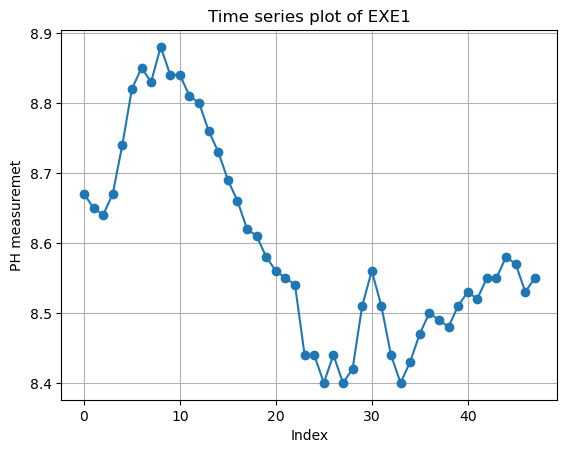

In [ ]:
# PLOT OF DATA
plt.plot(data['EXE1'], 'o-')
plt.xlabel('Index')
plt.ylabel('PH measuremet')
plt.title('Time series plot of EXE1')
plt.grid()
plt.show()

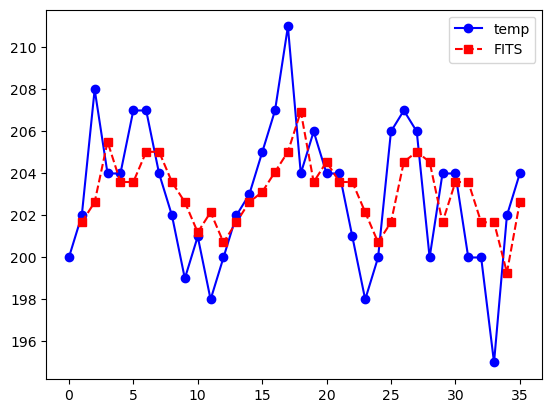

In [ ]:
# FITTED AGAINS DATA
plt.plot(data['temp'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

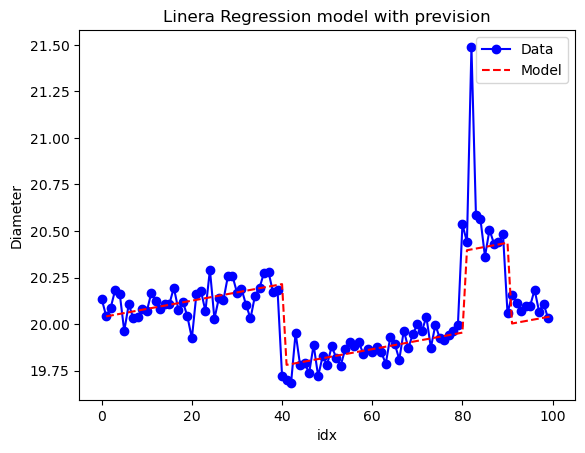

In [ ]:
# FIT OLD MODEL, NEW DATA
new_data = pd.concat([data, pd.DataFrame(data2, columns=['NameCol1', 'NameCol2'])], ignore_index=True)  # Add the new observations to the dataset
x_all = new_data[['idx', 'shift']]   # new_data  come from the concat of old and new data
x_all = sm.add_constant(x_all)
prediction = model.predict(x_all)

# Plotta i dati e le previsioni
plt.plot(new_data['diam'], color='b', marker='o', label ='Data')
#plt.scatter(new_data['idx'], new_data['diam'], label='Data')
plt.plot(new_data['idx'], prediction, color='red', linestyle = '--', label='Model')
plt.xlabel('idx')
plt.ylabel('Diameter')
plt.title('Linera Regression model with prevision')
plt.legend()
plt.show()

#  Residuals on new data
y_nuovi_effettivi = data2['diam']  # Valori effettivi per i nuovi dati
residuals2 = y_nuovi_effettivi - prediction

new_residuals =  pd.DataFrame({'res':residuals2})
df_SCC_new = pd.concat([df_SCC, pd.DataFrame(new_residuals, columns=['res'])], ignore_index=True)
df_SCC_new.head(10)

data2_IMR = qda.ControlCharts.IMR(df_SCC_new, 'res', subset_size=len(df_SCC))

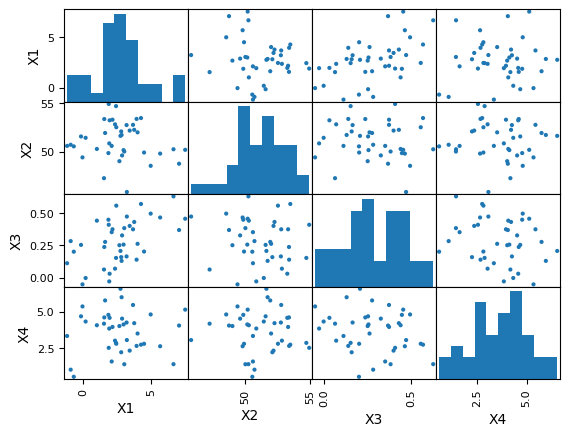

In [ ]:
# CORRELATION PLOT.
pd.plotting.scatter_matrix(data, alpha = 1)
plt.show()

/opt/anaconda3/envs/qda_environment_MAC/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/qda_environment_MAC/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/qda_environment_MAC/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/qda_environment_MAC/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

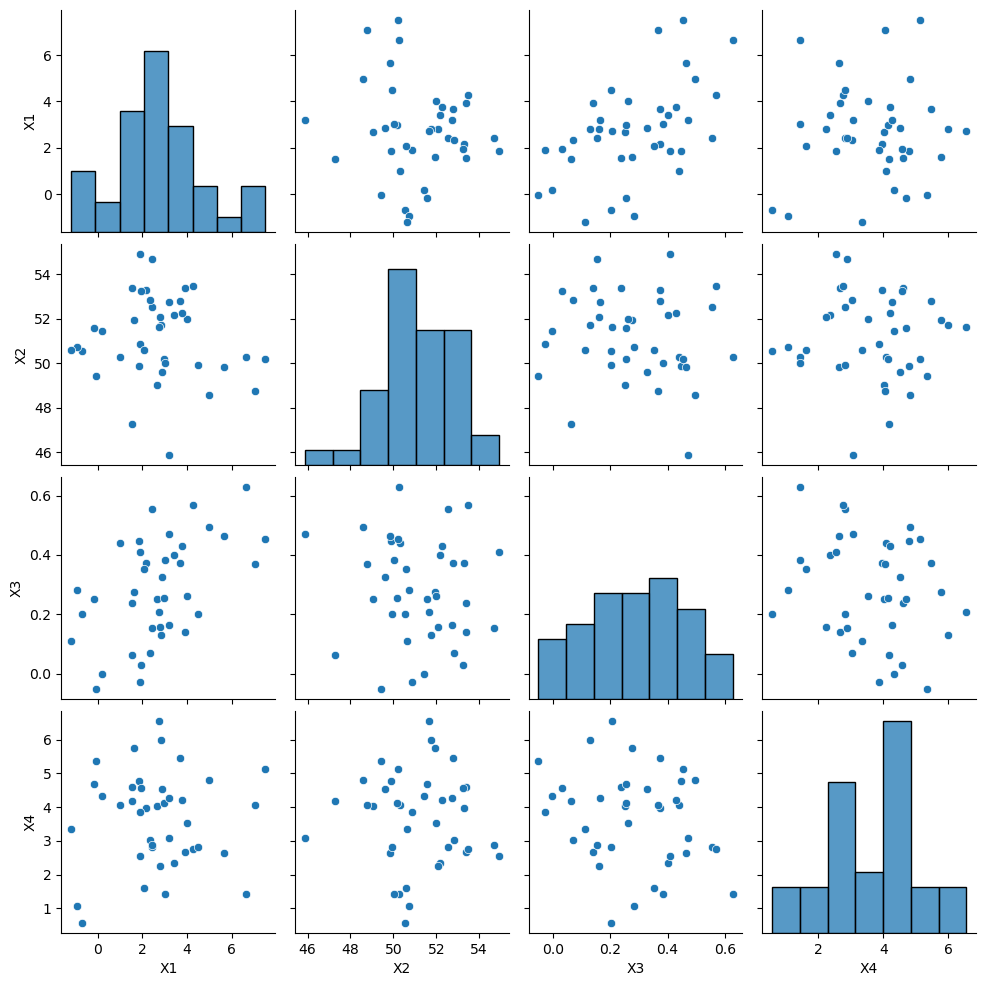

In [ ]:
import seaborn as sns
sns.pairplot(data)
plt.show()

In [ ]:
# HISTOGRAM
plt.hist(data['NameVar'], bins=100, edgecolor='black')
plt.show()

In [ ]:
# BOXPLOTcreate
# Plot box plot to visualize the distribution and identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['Solidity'])
plt.title(f'Boxplot of {'Solidity'}')
plt.show()

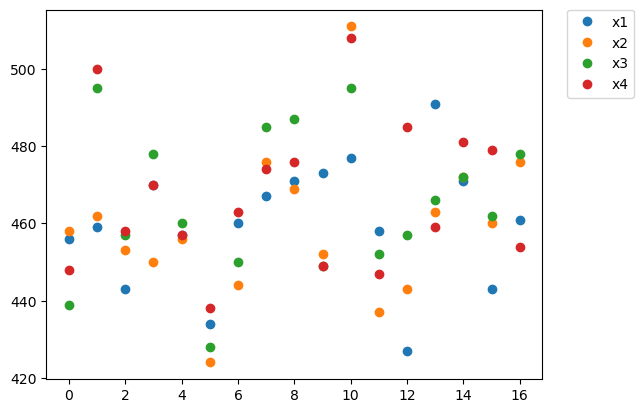

In [ ]:
# SCATTER PLOT:
# Make a scatter plot of all the columns against the index
plt.plot(data['Var1'], linestyle='none', marker='o', label = 'Var1')
plt.plot(data['Var2'], linestyle='none', marker='o', label = 'Var2')
plt.plot(data['Var3'], linestyle='none', marker='o', label = 'Var3')
plt.plot(data['Var4'], linestyle='none', marker='o', label = 'Var4')
plt.plot(data['Var5'], linestyle='none', marker='o', label = 'Var5')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

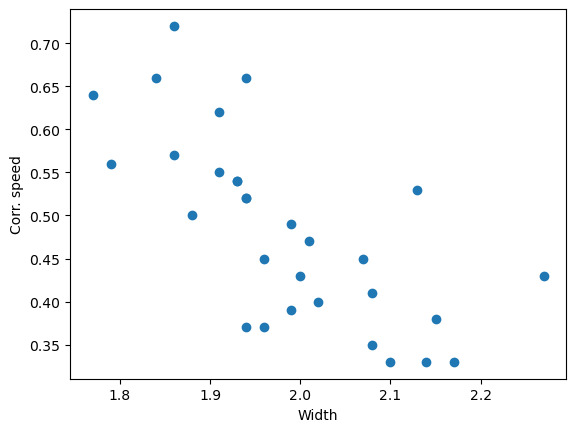

In [ ]:
# Plot the data
plt.scatter(NameCol1, NameCol2)
plt.xlabel('NameCol1')
plt.ylabel('NameCol2')
plt.show()

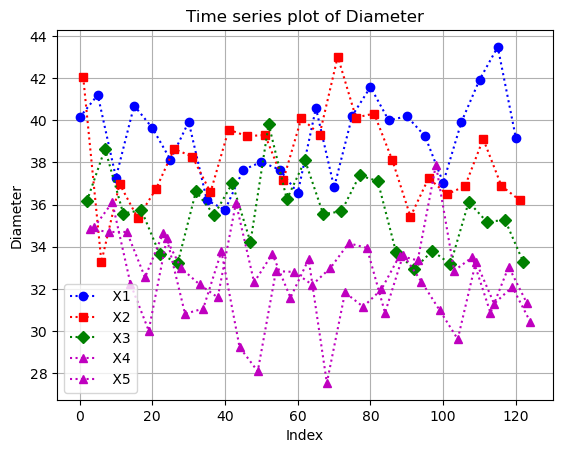

In [ ]:
plt.plot(data_stack['value'][data_stack['Repeated'] == 1], 'o:b', label = ' X1') # We want to print data_stack['value'] based on data_stack['Repeated']
plt.plot(data_stack['value'][data_stack['Repeated'] == 2], 's:r', label = ' X2')
plt.plot(data_stack['value'][data_stack['Repeated'] == 3], 'D:g', label = ' X3')
plt.plot(data_stack['value'][data_stack['Repeated'] == 4], '^:m', label = ' X4')
plt.plot(data_stack['value'][data_stack['Repeated'] == 5], '^:m', label = ' X5')

plt.xlabel('Index')
plt.ylabel('Diameter')
plt.legend()
plt.title('Time series plot')
plt.grid()
plt.show()

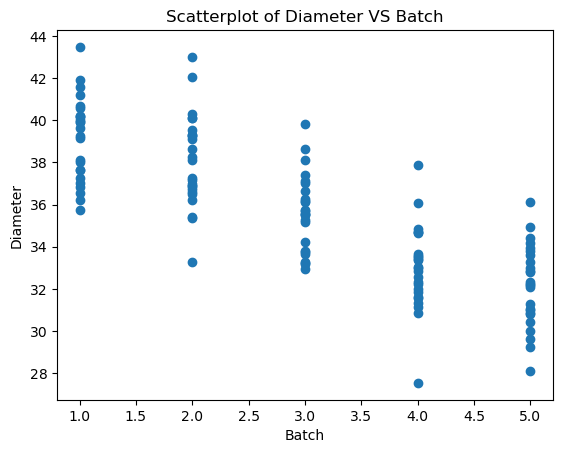

In [ ]:
plt.scatter(data_stack['Repeated'], data_stack['value'])
plt.xlabel('Batch')
plt.ylabel('Diameter')
plt.title('Scatterplot of Diameter VS Batch')
plt.show()

In [ ]:
# TIME SERIES PLOT
#->  (since it is a sequence of observation)

plt.figure(figsize=(15, 5))  # to make visualization more clear
plt.plot(data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


## Autocorrelation:

In [ ]:
#ACF and PACF
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['Ex4'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['Ex4'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


# Hypotesis Tests:


In [ ]:
# RUNS TEST
stat_runs, pval_runs = runstest_1samp(data['NameCol'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
# ACF & PACF PLOT
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['NameCol'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['NameCol'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data['NameCol'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)
# QQ-plot
stats.probplot(data['NameCol'], dist="norm", plot=plt)
plt.show()

> **1° MODEL TYPE**
>
> **Time series** model or **distributional** model.
>
> We can verify if the process is random by using :
> 1. time series plot (qualitative)
> 2. ACF/PCAF (qualitative)
> 3. runs test (quantitative)
> 4. Bartlett’s test (quantitative)
> 5. LBQ test (quantitative)

## Time Series Plot:

In [ ]:
# Time series plot
plt.plot(data, 'o-')
plt.xlabel('Time points')
plt.ylabel('Time to ship the order [days]')
plt.title('Time series plot')
plt.grid()
plt.show()

## Runs Test

In [ ]:
# RUNS TEST
stat_runs, pval_runs = runstest_1samp(data['Ex2'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))

# _, pval_runs = runstest_1samp(data['NameCol'], correction=False)
# print('Runs test statistic = {:.3f}'.format(_))
# print('Runs test p-value = {:.3f}'.format(pval_runs))
# alfa = 0.05
# if pval_runs< alfa:
#     print('Reject H0: the process is not random')
# else:
#     print('Accept H0: the process is random')

In [ ]:
# DATASET creation:
NewData = pd.DataFrame()
for i in range (0, 40):
        NewData['NameCol'] = OldData['NameCol']

plt.plot(NewData[NameCol1][NewData['NameCol2'] ==])

## ACF/PACF

Autocorrelation & Partial Autocorrelation: 

**OBJ:** measure the correlation between observations in a time series. 

**VIOLATION:** chekc the schemes

In [ ]:
# ACF & PACF PLOT
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['NameCol'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['NameCol'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

There is a violation of the test 

lags = int(len(data)/3): standard

zero=False: we are not intrested in autocorrelation


## Histogram & Boxplot

In [ ]:
plt.hist(data)
plt.title('Histogram')
plt.show()

plt.boxplot(data)
plt.title('Boxplot')
plt.show()

# Normality Tests:

## Shapiro Test

In [ ]:
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data['NameCol'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)
# QQ-plot
stats.probplot(data['NameCol'], dist="norm", plot=plt)
plt.show()

In [ ]:
# CICLO FOR SHAPIRO
for column in data.columns:
    stat, p_value = shapiro(data[column])
    print(f'Test di Shapiro-Wilk per {column}:')
    print(f'Statistica = {stat:.3f}, p-value = {p_value:.3f}')

In [ ]:
# OUTLIER REMOTION - REMOVE OBSERVATION:
# Remove outlier (point 30) to check the distribution without it
data_out = data.drop(index=29) 

# OR
# OOC_idx = 28   # We are removing observation with idex 28
# data['NameCol'].iloc[OOC_idx] = np.nan

In [ ]:
# HIST & BOXPLOT
plt.hist(data_out)
plt.title('Histogram')
plt.show()

plt.boxplot(data_out)
plt.title('Boxplot')
plt.show()

## Box Cox transformation

-> **OBJ** : normalize a distribution that is not normal.
> $$x_{BC,i} = \left\{ \begin{array}{ll} \frac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\ \ln x_i & \text{if } \lambda = 0 \end{array} \right.$$
 - it is a power transformation

-> **DEF**: a transformation of non-normal dependent variables into a normal shape.

- It would find out the best value of $\lambda$ that make the distribution normal.

> $y = (x^\lambda - 1) / \lambda $, for $\lambda \neq 0$
>
> $y = ln(x)$, for $\lambda = 0$


**tips**: if we like the box-cox we can copy it in the old part of the dataframe: 
> data['life'] = data_norm

In [ ]:
# BOX-COX
data['NameCol'] = data['NameCol'].replace(0, 0.00001)   # Substitute a small positive number to all those null
[data_norm, lmbda] = stats.boxcox(data['NameCol']) 
print('Lambda = %.3f' % lmbda)                          # Minimum standard deviation

#PLOT
plt.hist(data_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

# NORMALITY TEST
stat, p_shapiro = stats.shapiro(data_norm)
print('Statistics=%.3f, p=%.3f' % (stat, p_shapiro))
# interpret
alpha = 0.05
if p_shapiro > alpha:
    print('Fail to reject H0')
else:    
    print('Reject H0')

# QQPLOT
stats.probplot(data_norm, dist="norm", plot=plt)
plt.show()

data['NameCol'] = data_norm

In [ ]:
# BOX-COX
data['NameCol'] = data['NameCol'].replace(0, 0.00001)   # Substitute a small positive number to all those null
data_norm = stats.boxcox(data['NameCol'], lmbda = lmbda) 


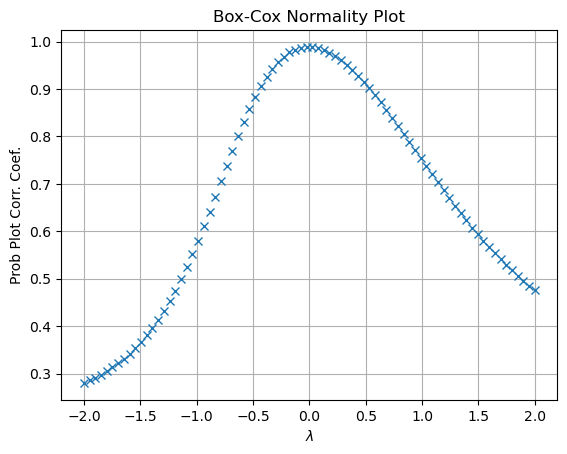

In [ ]:
# It is also possible to find the best value of lambda for the transformation
fig = plt.figure()
ax = fig.add_subplot(111)
stats.boxcox_normplot(data['NameCol'], -2, 2, plot=ax)
# add grid
ax.grid(True)



### Prediction Intrval & Back Transformation:

-> HP: Processed data are
- Normal &
- Independent (NID)


In [ ]:
alpha = 0.05
df = len(data_norm) - 1
Xbar = data_norm.mean()
s = data_norm.std()
t_alpha = stats.t.ppf(1 - alpha/2, df)


[pred_lo, pred_up] = [Xbar-t_alpha*s,Xbar+t_alpha*s]
print('Two-sided prediction interval for transformed data: [%.3f %.3f]' % (pred_lo, pred_up))

**Attention**: this is the prediction interval on the transformed data.
To estimate the prediction interval on the **original data** we need to back transform.

Remind:
$y = (x^\lambda - 1) / \lambda $, for $\lambda \neq 0$

Thus:
$x = (y\lambda + 1)^{(1/\lambda)}$ 

In [ ]:
[pred_lo_ORIG, pred_up_ORIG] = [(pred_lo*lmbda+1)**(1/lmbda),(pred_up*lmbda+1)**(1/lmbda)]
print('Two-sided prediction interval for original data: [%.3f %.3f]' % (pred_lo_ORIG, pred_up_ORIG))

# Autocorrelation

-> Firstly we'll define tools to detect autocorrelation:
- ACF
- Bartlett's test
- LBQ

-> **MITIGATION**
- Gapping
- Batching

##  ACF, Autocorrelation Function

-> **OBJ**: computes the autocorrelation coefficients of a time series for a range of lags. 
- No graphical evidence of auto-correlation from the sample ACF plot.

We can verify it with quantitative tests, e.g.:
- Bartlett's test
- LBQ test

> On transformed data
> 
> **Bartlett's test for a specific lag $k$**
>
> $ H_{0} : \rho_{k}=0 $
>
> $ H_{1} : \rho_{k}\neq{0} $
>
> $ \rho_{k} $: true autocorrelation at lag $k$ 
>
> $ r_{k} $: sample autocorrelation at lag $k$ 
>
> Rejection region: $$ |r_{k}| \gt \frac{z_{\alpha/2}}{\sqrt{n}} $$


In [ ]:
# Plot the acf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt 

sgt.plot_acf(data['NameCol'], lags = int(len(data)/3), zero=False) # lags = int(len(data)/3): standard// zero=False: we are not intrested in autocorrelation
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf   # we need acf function

n = len(data)

#autocorrelation function
[acf_values, lbq, _] = acf(data['NameCol'], nlags = int(np.sqrt(n)), qstat=True, fft = False)
        # acf_values: autocorrleation values
        # lbq: article statitstic
        # _: thing not useful
        # nlags: of which we want to assess autocorrelation
        # qstat=True: calculates the Ljung-Box Q-statistic for each lag.
        # ft=False: specifies not to use the Fast Fourier Transform for computation.




## Bartlett

-> **OBJ**:  determine if the autocorrelation at this lag is significantly different from zero. 

In [ ]:
#Bartlett's test at lag 1:
alpha = 0.05                            # Set the significance level (alpha) for the hypothesis test to 0.05
lag_test = 1                            # Specify the lag at which to perform the test (lag 1).
rk = acf_values[lag_test]               # Extract the ACF value at the specified lag (lag 1).
z_alpha2 = stats.norm.ppf(1-alpha/2)    # alculate the critical value from the standard normal distribution for the specified significance level.
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('Reject H0 => There is autocorrelation at lag %d)' % (lag_test))
else: print('Accept H0 => there is NO autocorrelation at lag %d' % (lag_test))

## LBQ

> **For a global test at different lags, use Ljung-Box (LBQ) test**
> 
> $ H_{0} : \rho_{k}=0, k=1,...,L $ :  no autocorrelation in the Time Serie
>
> $ H_{1} : \exists k \in [1,L]$ such that $\rho_{k}\neq{0} $
>
> LBQ test statistic: 
> $$ LBQ = n(n+2) \sum_{k=1}^L { \frac{r_{k}^2}{n-k} } $$
>
> Under $ H_{0} $  ($\rho_{k}=0, k=1,...L $), 
> $ LBQ \sim \chi_{L}^2 $, and its rejection region is: $$ LBQ \gt {\chi_{\alpha,L}^2 } $$

In [ ]:
#LBQ test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

# lag_test = ?          # To be settles if nor runned before
lbq_test = acorr_ljungbox(data_norm, lags=[lag_test], return_df=True)
print('LBQ test statistic at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_stat']))
print('LBQ test p-value at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_pvalue']))

In [ ]:
# BY HAND:
lag_test = 6 # this is just an example; 

# Generally speaking: how many lags?
# Rule of thumb: L<sqrt(n)

Q0_LBQ = lbq[lag_test-1] # Estract LBQ statistic. the -1 s to slide an offset
print('Q0_LBQ = %f' % Q0_LBQ)

#Rejection region for chi square distribution 
dof = lag_test 
chi2_alfa= stats.chi2.ppf(1-alpha,dof)
print('Rejection region starts at %f' % chi2_alfa)

if Q0_LBQ>chi2_alfa:        
  print('The null hypothesis is rejected')                
else: 
  print('The null hypothesis is accepted')

# Compute the p-value for the LBQ test
pval = 1 - stats.chi2.cdf(Q0_LBQ, lag_test)
print('p-value = %f' % pval)

## Gapping

In [ ]:
# BUILT-IN ARRAY MANIPULATION FUNCIONALITIES:
gap_data = data['NameCol'][::gap_size] # Smarter way to take a value every 6.

Analyze data after Gapping

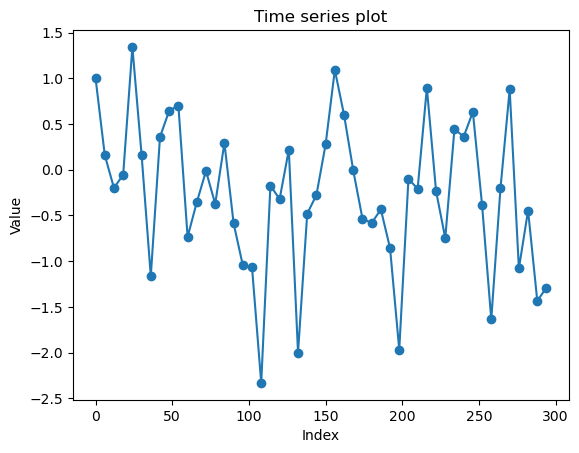

In [ ]:
# ACF PLOT
sgt.plot_acf(gap_data, lags = int(len(gap_data)/3), zero=False)
plt.show()

# TIME SERIES  plot and runs test
plt.plot(gap_data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# RUNS TEST
stat_runs, pval_runs = runstest_1samp(gap_data, correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alpha=0.05
if pval_runs < alpha:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')



In [ ]:
# FINAL CHECK FOR BOTH GAPPING
from statsmodels.tsa.stattools import acf

# Autocorrelation function
[acf_value, lbq, _] = acf(gap_data, nlags = int(len(gap_data)/3) , qstat=True)

# Bartlett's test at lag 1
lag_test=1
rk=abs(acf_value[lag_test])
alpha = 0.05 # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(gap_data))))

if rk>z_alpha2/np.sqrt(len(gap_data)):
    print('The null hypothesis is rejected')
else: 
    print('The null hypothesis is accepted')

In [ ]:
# GAPPING BY HAND:
gap_size= 6 # this is just an example, you can try different gapping intervals
gap_num= int(len(data)/gap_size)

gap_data= np.zeros((gap_num))  # We are populating the dataset putting one value in every set
for i in range (gap_num):
    gap_data[i]=data['Ex3'][i*6]

## Batching

In [ ]:
# WE decided to create a batch_num subgroup of size 6
batch_size = 6
batch_num = int(len(data)/batch_size)

j=0
batch_data = np.zeros((batch_num))
for i in range (batch_num):
    batch_data[i]=np.sum(data['NameCol'][j:j+batch_size])/batch_size
    j=j+batch_size

In [ ]:
# Alternative method
# Create a new column in the dataframe with the corresponding batch number
batch_size = 6
batch_num = int(len(data)/batch_size)
data['Batch'] = np.repeat(np.arange(1, batch_num+1), batch_size)

# Store the batch means in a new dataframe
batch_data = data.groupby('Batch').mean()

Data Analysis

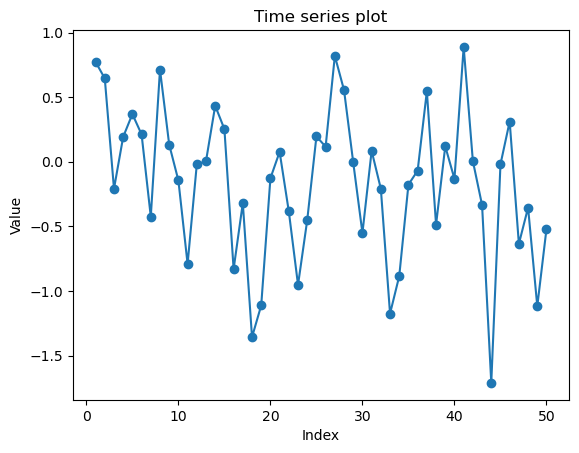

In [ ]:
#Time series plot
plt.plot(batch_data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Runs test  -> To check randomness
stat_runs, pval_runs = runstest_1samp(batch_data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
alpha=0.05
if pval_runs < alpha:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')

# Autocorrelation check:
# Plot the acf using the statsmodels library
sgt.plot_acf(batch_data, lags = int(len(batch_data)/3), zero=False)
plt.show()

In [ ]:
# FINAL CHECK FOR BOTH BATCHING
from statsmodels.tsa.stattools import acf

# Autocorrelation function
[acf_value, lbq, _] = acf(batch_data, nlags = int(len(batch_data)/3), qstat=True)

# Bartlett's test at lag 1
lag_test=1
rk=abs(acf_value[lag_test])
alpha = 0.05 # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(batch_data))))

if rk>z_alpha2/np.sqrt(len(batch_data)):
    print('The null hypothesis is rejected')
else: 
    print('The null hypothesis is accepted')


# Linear Models

0. Data plot
1. Check Randomness & Normal Distribution
2. ACF & PCF plots


Time Series Plot:

In [ ]:
# DATA PLOT
plt.plot(data['NameCol'], 'o-')
plt.xlabel('Index')
plt.ylabel('ylabel')                        # Change
plt.title('Time series plot of NameCol')    # Change
plt.grid()  
plt.show()


# RUNS TEST
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp
_, pval_runs = runstest_1samp(data['NameCol'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# p-val > 5% => Data are random.

## LINEAR REGRESSION MODEL

In [ ]:
# LINEAR REGRESSION MODEL
x = data['t']               # store regression and regressors.
x = sm.add_constant(x)      
y = data['time']            # what we want to model, the time
model = sm.OLS(y,x).fit()

# Print the model summary
qda.summary(model)

In [ ]:
# LINEAR REGRESSION MODEL
x = data[['s','lag1']][1:]              # store regression and regressors.
x = sm.add_constant(x)      
y = data['x'][1:]            # what we want to model2, the time
model2 = sm.OLS(y,x).fit()

# Print the model2 summary
qda.summary(model2)

In [ ]:
# EXPONENTIAL DECAY MODEL
data['e'] =  np.exp(-data['t'] * 0.1)  
# LINEAR REGRESSION MODEL
x = data['e']               # store regression and regressors.
y = data['te']            # what we want to model, the time
model = sm.OLS(y,x).fit()

## ACF & PCF

Used to define if the process is stationary

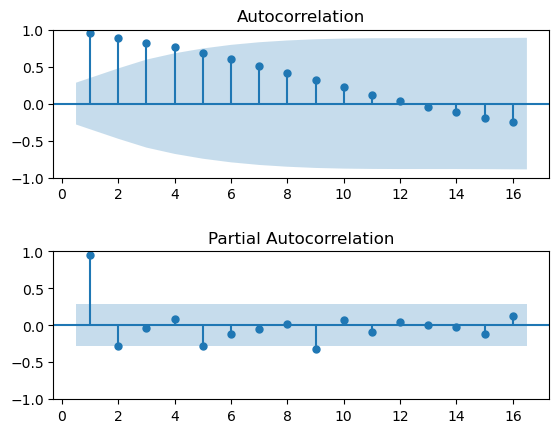

In [ ]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['NameCol'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['NameCol'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> There is a strong positive correlation. Decay of autocorrelation coefficients is not exponential.
> Based on ACF analysis, we can state that the process is non-stationary
>
> We can observe with a scatterplot the correlation between $X(t)$ and $X(t-1)$.

Since AFC is typically defined for one-dimensional time series => we have to put everything in a vectors

In [ ]:
# Transpose the dataset and stack the columns - FROM DTASET TO COLUMN
data_stack = data.transpose().melt()
# Remove unnecessary columns
data_stack = data_stack.drop('variable', axis=1)
data_stack.head()
# Plot the data first
plt.plot(data_stack['value'], color='b', linestyle='--', marker='o')
plt.show()

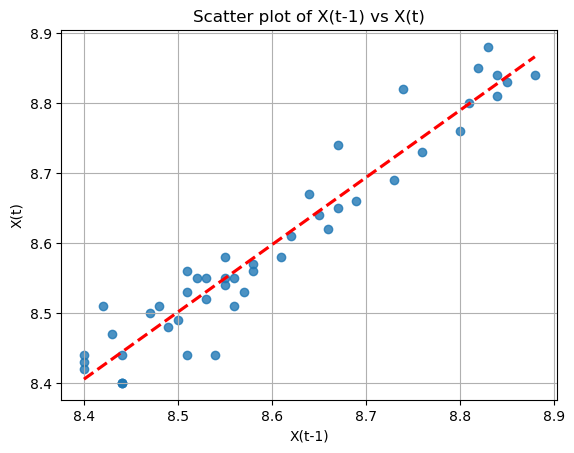

In [ ]:
# SCATTERPLOT
data['lag1'] = data['NameCol'].shift(1)    # calculate the lag1 from data

#create scatterplot with regression line using seaborn and set axis labels
sns.regplot(x=data['lag1'], y=data['NameCol'], ci=None, line_kws={'color':'red', 'ls':'--'})
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.xlabel('X(t-1)')
plt.ylabel('X(t)')
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.grid()



### Dickey-Fuller Test
ADF Statistic: Un valore più negativo indica una maggiore evidenza contro l'ipotesi nulla di non stazionarietà.

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Verifica della stazionarietà con il test ADF
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

### Differencing Operator

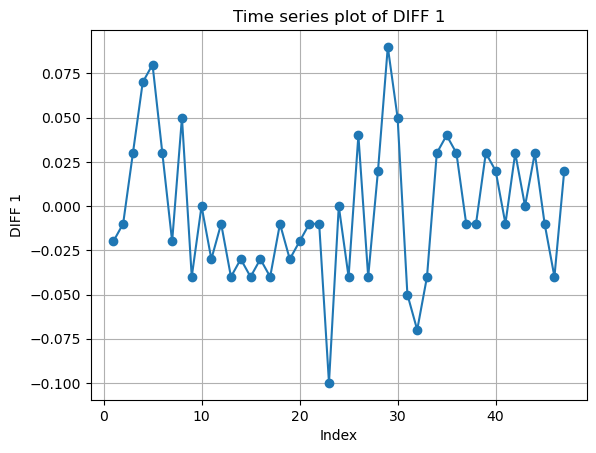

In [ ]:
# CREATE A NEW TIME SERIE - differentiated operator:
# Calculate the difference between the data and the lag1
data['diff1'] = data['NameCol'] - data['lag1']

plt.plot(data['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Check if differences at lag 1 are NID

In [ ]:
#Let's calculate the p-value (exclude the first value because it is null)
_, pval_runs = runstest_1samp(data['diff1'][1:], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

If residuals...
- are NID => fit ARIMA (1,1,0)
- are NOT NID => fit AR(1)


??? to check

## AR(1) Model

In [ ]:
# Calculate the lag1 from data
data['lag1'] = data['NameCol'].shift(1) # ATTENZIONE shift(x) if AR(x)

import seaborn as sns # Scatterplot of the correlation between X(t) & X(t-1) 
sns.regplot(x='lag1', y='NameCol', data=data, fit_reg=True, ci=None, line_kws={'color': 'red', 'lw': 2, 'ls': '--'})
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.xlabel('X(t-1)')
plt.ylabel('X(t)')
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.grid()

In [ ]:
#calculate a regression model with constant and lag1
import statsmodels.api as sm
import qda

# If needed add a column with the leggend temperature to use as regressor
# data['lag1'] = data['temp'].shift(1)

x = data['lag1'][1:]
x = sm.add_constant(data['lag1'][1:]) # this command is used to consider a constant to the model, is equivalent to create and add a column of ones
y = data['NameCol'][1:]
model = sm.OLS(y, x).fit() #fit the AutoRegressive model

qda.summary(model)

In [ ]:
# CREATE A NEW TIME SERIE - differentiated operator:
# Calculate the difference between the data and the lag1
data['diff1'] = data['NameCol'] - data['lag1']

plt.plot(data['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Without costant term:

In [ ]:
x = data['lag1'][1:]
y = data['NameCol'][1:]
model = sm.OLS(y, x).fit()
qda.summary(model)

Check assumptions on residuals:
- Normality
- Time Independence
- Autocorrelation

In [ ]:
# NORMALITY CHECK on RESIDUALS
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')

_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

In [ ]:
# RANDOMNESS CHECK on RESIDUALS
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))


In [ ]:
#AUTOCORRELATION CHECK
# Check the autocorrelation of the residuals
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

# or

from statsmodels.tsa.stattools import acf
#autocorrelation function
[acf_value, lbq, _] = acf(model.resid, nlags = int(len(model.resid)/3) , qstat=True)

#Bartlett's test at lag 1
lag_test=1
rk=abs(acf_value[lag_test])
alpha = 0.05 # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(model.resid))))


## ARIMA

> The function `qda.ARIMA()` requires as inputs:
> 1. The dataframe with the data.
> 2. The `order` parameter, i.e., the $(p, d, q)$ of the model: $AR(p)$, $I(d)$, $MA(q)$.
> 3. The `add_constant` parameter, i.e. the presence of a constant term in the model:
>    - `False`, for no constant term.
>    - `True`, for a constant term.

**HP**: arima doesn't want trend => We have to remove with the following command

In [ ]:
# ARIMA, doing the difference operator before
data['diff1'] = data['PowerLoss'].diff(1) # To tranform the temporal series into a stationary one (removing the trend, required for ARIMA applly).

plt.plot(data['diff1'], 'o-')
plt.xlabel('PowerLoss')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test p-value = 0.181


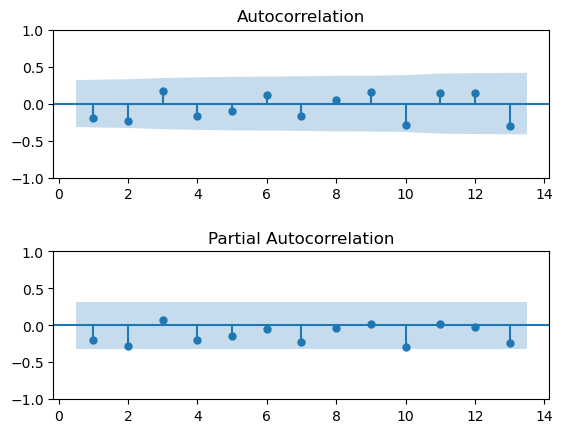

In [ ]:
_, pval_runs = runstest_1samp(data['diff1'][1:], correction=False) # Wouldn't work if we don't add [1:] bcse the first element is NaN
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


In [ ]:
# FIT ARIMA with constant term
x = data['NameCol']
model = qda.ARIMA(x, order=(0,1,1), add_constant = True) # qda.ARIMA(DataSet, order=(p,d,q), add_constant = True): function. add_cosnstant parameter (boolean value).

qda.ARIMAsummary(model)

Model form:

> $Y_t - Y_{t-1} = \nabla Y_t = \mu - \theta_{1}  \epsilon_{t-1} + \epsilon_t $



In [ ]:
# FIT ARIMA withOUT constant term
x = data['NameCol']
model = qda.ARIMA(x, order=(0,1,1), add_constant=False) # ARIMA(p,d,q), no constant term

qda.ARIMAsummary(model)

Model form:

> $Y_t - Y_{t-1} = \nabla Y_t = \theta_{1}  \epsilon_{t-1} + \epsilon_t $


## Residuals

In [ ]:
# RESIDUALS EXTRACTION
residuals = model.resid[1:]  # since we have a MA of order 1 => we don't have access to the fist element
# RUNS TEST
stat_runs, pval_runs = runstest_1samp(residuals, correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
# NORMALITY
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)
# Plot the qqplot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()
# AUOCORRELATION:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [ ]:
# ARIMA
df_SCC = pd.DataFrame(model.resid, columns=['res'])
data_IMR = qda.ControlCharts.IMR(df_SCC, 'res') # If we want to change K, otherwise without K = K_alpha


## Prediction Interval

In [ ]:
# Predict future outcomes using the regression model
last_lag = data['PowerLoss'].iloc[-1] # Retrives the last obs from the dataset
print('Last Lag= %.3f' % last_lag)

Last Lag= 4.040
Next process outcome = 29.496
      mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  29.4959   4.3005        20.7562        38.2355       20.7559       38.2359


/var/folders/52/gfc1s2zs2z93vlghjfmnj2sm0000gn/T/ipykernel_1719/1314986773.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Next process outcome = %.3f' % Yhat)


In [ ]:
# Predict the next value
Yhat = model.predict([1, 41, last_lag, 0]) 
    # 1: intercept; 
    # 41: observation to predict; 
    # last_lag: last obs used as lagged value; 
    # 0: vaue of the dummy variable in the prediction.
print('Next process outcome = %.3f' % Yhat)

Next process outcome = 29.496


/var/folders/52/gfc1s2zs2z93vlghjfmnj2sm0000gn/T/ipykernel_1719/177025496.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Next process outcome = %.3f' % Yhat)


In [ ]:
# Compute the prediction interval
prediction_df = model.get_prediction([1, 41,last_lag,0]).summary_frame(alpha=0.05) 
    # Same of before; 
    # .summary_frame(alpha=0.05) creates a summary frame of the prediction, specifying a 95% confidence interval (alpha=0.05).
print(prediction_df)


      mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  29.4959   4.3005        20.7562        38.2355       20.7559       38.2359


# PCA, Principal Component Analysis

> - Dataset $X$ is a $n \times p$ matrix, where $n$ is the number of observations, and $p$ is the number of variables.
> - The sample variance-covariance matrix $S$ is a $p \times p$ matrix.
> - The sample correlation matrix $R$ is a $p \times p$ matrix.
>
> Eigendecomposition of $S$:
> - Eigenvalues is a $p \times 1$ vector, $\lambda_1, \lambda_2, \dots, \lambda_p$ (explained variance).
> - Eigenvectors is a $p \times p$ matrix, $\mathbf{u_1}, \mathbf{u_2}, \dots, \mathbf{u_p}$ (loadings).
> $$ \mathbf{u_1} = [u_{11}, u_{12}, \dots, u_{1p}]^T$$
> $$ \mathbf{u_2} = [u_{21}, u_{22}, \dots, u_{2p}]^T$$
> $$ \vdots$$
> $$ \mathbf{u_p} = [u_{p1}, u_{p2}, \dots, u_{pp}]^T$$
> - Projection of data onto the space spanned by the PCs (scores) ($n \times p$ matrix):
> $$ \mathbf{z_1} = [z_{11}, z_{21}, \dots, z_{n1}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_1}$$
> $$ \mathbf{z_2} = [z_{12}, z_{22}, \dots, z_{n2}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_2}$$
> $$ \vdots$$
> $$ \mathbf{z_p} = [z_{1p}, z_{2p}, \dots, z_{np}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_p}$$

**TIPS**:
- λ is the value of the variance too if we build the control limits
- Eigenvectors = Loadings

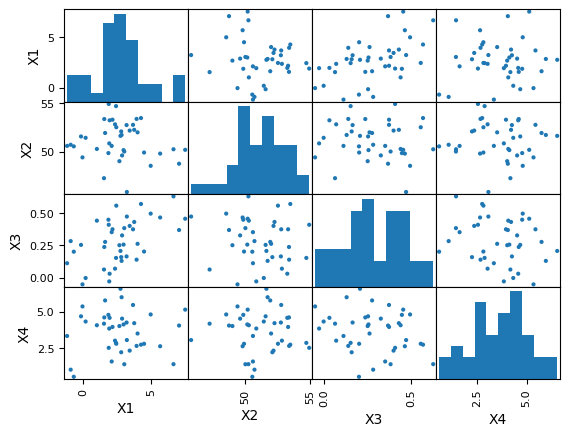

In [ ]:
# CORRELATION PLOT.
pd.plotting.scatter_matrix(data, alpha = 1)
plt.show()

**VARIANCE-COVARIANCE MATRIX**

-> **DEF**: measures the covariances (and variances) of the variables in your dataset. It reflects the absolute magnitudes of the variances and covariances.

-> Use it when your **variables are measured on similar scales or units**. This is because the absolute values of the variances and covariances are meaningful and comparable.

If __marginal variances__ (in the diagonal) are too different => We should use the correlation matrix.

In [ ]:
# VARIANCE & COVARIANCE MATRIX 
cov_matrix = data.cov()
print('\n Variance-Covariance Matrix')
print(cov_matrix)

**CORRELATION MATRIX**

-> **DEF**: measures the linear relationships between variables, **standardizing the data** so that each variable has a mean of zero and a standard deviation of one. It focuses on the relative magnitudes of the relationships.

-> **Use it when your variables are measured on different scales or units**. This ensures that each variable contributes equally to the analysis, regardless of its original scale.

-> **Using this it's equal to standardize the dataset**

In [ ]:
# CORRELATION MATRIX
corr_matrix = data.corr()
print('\n Correlation Matrix')
print(corr_matrix)

In [ ]:
# STANDARDIZE DATA:
data_std = (data - data.mean()) / data.std() 
data_std.describe()

# ATTENTION, run the PCA on the data_std 

In [ ]:
# import the libraries for PCA
from sklearn.decomposition import PCA

pca = PCA()                                         # 1.Create the PCA object
pca.fit(data)    #ATTENTION USE data_std if needed  # 2.Fit the PCA object to the data (original dataframe)
print("Eigenvalues \n", pca.explained_variance_)    # Print the eigenvalues
print("\nEigenvectors \n", pca.components_)         # Print the eigenvectors 
print("\nExplained variance ratio \n", pca.explained_variance_ratio_)# Print the explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca.explained_variance_ratio_))# Print the cumulative explained variance ratio
# 3. SCORES (i.e. all the principal components, n x 3) 
scores = pca.transform(data)                                        # Array
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3'])      # # of zi equal to the SCORES
# Print the first rows of the scores DATAFRAM (use this for further operations)
scores_df.head()
# Plot the scores in a scatter plot
pd.plotting.scatter_matrix(scores_df, alpha = 1)
plt.show()
# 4.Plot the LOADINGS
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(pca.components_[0], 'o-')
ax[0].set_title('Loading 1')
ax[1].plot(pca.components_[1], 'o-')
ax[1].set_title('Loading 2')
ax[2].plot(pca.components_[2], 'o-')
ax[2].set_title('Loading 3')
plt.show()
# 5.Plot EigenVALUES (scree plot)
plt.plot(pca.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()
# 6.Plot the CUMULATIVE Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
# add a bar chart to the plot
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')
plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.show()
# 7.SCATTERPLOT (first 2 scores)
plt.scatter(scores_df['z1'], scores_df['z2'])
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Scatterplot of z1 vs z2')
plt.show()

In [ ]:
# import the libraries for PCA
from sklearn.decomposition import PCA

pca = PCA()                                         # 1.Create the PCA object
pca.fit(data)                                       # 2.Fit the PCA object to the data (original dataframe)
print("Eigenvalues \n", pca.explained_variance_)    # Print the eigenvalues
print("\nEigenvectors \n", pca.components_)         # Print the eigenvectors 
print("\nExplained variance ratio \n", pca.explained_variance_ratio_)# Print the explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca.explained_variance_ratio_))# Print the cumulative explained variance ratio



> Projection of data onto the space spanned by the PCs (scores) ($n \times p$ matrix):
> $$ \mathbf{z_1} = [z_{11}, z_{21}, \dots, z_{n1}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_1}$$
> $$ \mathbf{z_2} = [z_{12}, z_{22}, \dots, z_{n2}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_2}$$
> $$ \vdots$$
> $$ \mathbf{z_p} = [z_{1p}, z_{2p}, \dots, z_{np}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_p}$$

In [ ]:
# 3. SCORES (i.e. all the principal components, n x 3) 
scores = pca.transform(data)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3'])      # # of zi equal to the variables
# Print the first rows of the scores dataframe
scores_df.head()
# Plot the scores in a scatter plot
pd.plotting.scatter_matrix(scores_df, alpha = 1)
plt.show()

# Plot the scores in a scatter plot
pd.plotting.scatter_matrix(scores_df, alpha = 1)
plt.show()

**LOADINGS**

-> To show how the variables (start from 0, x axe) influence the relative loading (on the y axe)

In [ ]:
# 4.Plot the LOADINGS
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(pca.components_[0], 'o-')
ax[0].set_title('Loading 1')
ax[1].plot(pca.components_[1], 'o-')
ax[1].set_title('Loading 2')
ax[2].plot(pca.components_[2], 'o-')
ax[2].set_title('Loading 3')
plt.show()

In [ ]:
# 5.Plot EigenVALUES (scree plot)
plt.plot(pca.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

In [ ]:
# 6.Plot the CUMULATIVE Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
# add a bar chart to the plot
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')
plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.show()

In [ ]:
# 7.SCATTERPLOT (first 2 scores)
plt.scatter(scores_df['z1'], scores_df['z2'])
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Scatterplot of z1 vs z2')
plt.show()

## Data Standardization

In [ ]:
 # Standardize the data by subtracting the mean and dividing by the standard deviation
data_std = (data - data.mean()) / data.std()

data_std.describe()

# Standard deviation for all the three variables is equal to 1.
# Mean value, should be equal to 0. in this case is very close to it => we are happy.

In [ ]:
cov_matrix_std = data_std.cov()
print(cov_matrix_std)

??-> Sample correlation matrix has to coincides with the sample variance covariance matrix of standardized variables?

### Compare Original PCA & Standardized PCA

In [ ]:
# Apply the PCA on the correlation matrix instead of the covariance matrix
pca_corr = PCA()
pca_corr.fit(data_std) # I'm using the new values finded.
# Compare the eigenvalues
print("Eigenvalues from ORIGINAL data \n", pca.explained_variance_)
print("Eigenvalues from STANDARDIZED data \n", pca_corr.explained_variance_)
# Compare the eigenvectors
print("\nEigenvectors from ORIGINAL data \n", pca.components_)
print("Eigenvectors from STANDARDIZED data \n", pca_corr.components_)
# Compare the explained variance ratio
print("\nExplained variance ratio from ORIGINAL data \n", pca.explained_variance_ratio_)
print("Explained variance ratio from STANDARDIZED data \n", pca_corr.explained_variance_ratio_)
# Compare the cumulative explained variance ratio
print("\nCumulative explained variance ratio from ORIGINAL data \n", np.cumsum(pca.explained_variance_ratio_))
print("Cumulative explained variance ratio from STANDARDIZED data \n", np.cumsum(pca_corr.explained_variance_ratio_))

In [ ]:
# Plot the loadings of original and standardized data
fig, ax = plt.subplots(2, 3, figsize = (15, 5))
ax[0, 0].plot(pca.components_[0], 'o-')
ax[0, 0].set_title('Loading 1, original data')
ax[0, 1].plot(pca.components_[1], 'o-')
ax[0, 1].set_title('Loading 2, original data')
ax[0, 2].plot(pca.components_[2], 'o-')
ax[0, 2].set_title('Loading 3, original data') 
ax[1, 0].plot(pca_corr.components_[0], 'o-')
ax[1, 0].set_title('Loading 1, standardized data')
ax[1, 1].plot(pca_corr.components_[1], 'o-')
ax[1, 1].set_title('Loading 2, standardized data')
ax[1, 2].plot(pca_corr.components_[2], 'o-')
ax[1, 2].set_title('Loading 3, standardized data')
fig.subplots_adjust(hspace = 0.3)
plt.show()

## Data Reconstruction:

### Data Reconstruction K=2

> Data reconstruction based on the first $K=2$ PCs. 
> $$\mathbf{\hat{x}}_j^*(K) = z_{j1}\mathbf{u_1} + z_{j2}\mathbf{u_2}$$
> for $j=1,\ldots,n$.
>
> Remind that we are using the standardized data $\mathbf{\hat{x}}_j^*$. If we want to reconstruct the original data $\mathbf{\hat{x}}_j$, we need to multiply the reconstructed data by the standard deviation and add the mean.
> $$\mathbf{\hat{x}}_j(K) = \mathbf{\hat{x}}_j^* s_i + \bar{x}_i$$

In [ ]:
# First let's save in an array the mean and standard deviation of the original data
mean = data.mean()
std = data.std()

# Compute the reconstructed data_std using the first two principal components
reconstructed_data_std = scores_df[['z1', 'z2']].dot(pca_corr.components_[0:2, :])
# Now use the mean and standard deviation to compute the reconstructed data
reconstructed_data = reconstructed_data_std.dot(np.diag(std)) + np.asarray(mean)

# Compare the original data with the reconstructed data
print("Original data\n", data.head())
print("\nReconstructed (ORIGINAL) data\n", reconstructed_data.head())


### Data Reconstruction K=3

In [ ]:
# Compute the reconstructed data_std using the first two principal components
reconstructed_data_std_3 = scores_df.dot(pca_corr.components_)
# Now use the mean and standard deviation to compute the reconstructed data
reconstructed_data_3 = reconstructed_data_std_3.dot(np.diag(std)) + np.asarray(mean)

# Compare the original data with the reconstructed data
print("Original data\n", data.head())
print("Reconstructed (ORIGINAL) data\n", reconstructed_data_3.head())


## From the Covariance Matrix

**EIGENVALUES & EIGENVECTORS COMPUTATION**

In [ ]:
# Given the covariance matrix:
cov_matrix = np.array([[4.4, 3.6,0.7], [3.6,4.6,1.5],[0.7,1.5,0.8]])
# We can compute the standard deviation of it:
std_deviations = np.sqrt(np.diag(cov_matrix))
# EIGENVALUES & EIGENVECTORS
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", np.round(eigenvectors,3))

Eigenvalues: [8.423637   1.26052414 0.11583887]
Eigenvectors: [[-0.672 -0.68   0.293]
 [-0.712  0.486 -0.507]
 [-0.202  0.549  0.811]]


**PRINCIPAL COMPONENT COMPUTATION**

In [ ]:
# PC_i =  (sum till eigenvalue_i) / (sum tot eigenvalues)
first  = 8.424/(8.424+1.261+0.116)
second = (8.424+1.261)/(8.424+1.261+0.116)
print(first,second)

0.8595041322314051 0.9881644730129578


**SCORES**

In [ ]:
z = pd.DataFrame()
Xbar = data.mean()

# SCORES HAND COMPUTATION
z['z1']=(data-Xbar).dot(eigenvectors[0])
z['z2']=(data-Xbar).dot(eigenvectors[1])

# SPC, Statistical Process Control


## iid Data:

### Xbar & R Control Chart:

#### Procedure:
0. Check: Correlation, Data Randomness & Normality

    Verify the normality assumption asssuming all the data coming from the same population
2. Compute the mean & range for each sample
3. Compute the Limits
    

##### DATA INSPECTION

-> Check if there are some patterns btw variables

In [ ]:
# SCATTER PLOT
# Make a scatter plot of all the columns against the index
plt.plot(data['NameCol1'], linestyle='none', marker='o', label = 'Var1')  
plt.plot(data['NameCol2'], linestyle='none', marker='o', label = 'Var2')
plt.plot(data['NameCol3'], linestyle='none', marker='o', label = 'Var3') # So on per each column

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# NORMALITY CHECK
data_stack = data.stack()  # Stack the data into a single column

# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_stack)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_stack, dist="norm", plot=plt)
plt.show()

In [ ]:
# UNSTACK DATA
data_BC_unstack = data_norm.reshape(data_stack)
data_BC_unstack = pd.DataFrame(data_BC_unstack, columns = data.columns) # and convert it to a DataFrame
data_BC_unstack.head()

If looks like outliers are present or distribution is skewed

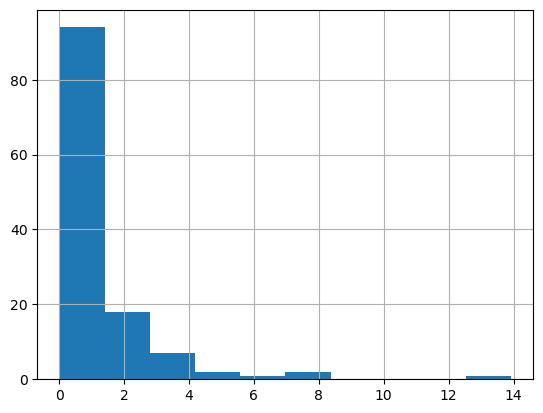

In [ ]:
# Stack the data into a single column
data_stack = data.stack()

# Plot a histogram of the data_stack
data_stack.hist()
plt.show()

##### Computation

-> Apply the function to each row of the data frame

In [ ]:
# JUST FUNCTION - directly from dataset:
data_XR_qcc = qda.ControlCharts.XbarR(data)

In [ ]:
data_XR = data.copy()                                           # Make a copy of the data: whenever we assign the main in the dataset and bring some change in the Xbar, those changing could affect the result too
data_XR['sample_mean'] = data.mean(axis=1)                      # Add a column with the mean of the rows. Aveage on row (axis=1) 
data_XR['sample_range'] = data.max(axis=1) - data.min(axis=1)   # Add a column with the range of the rows

data_XR.head()  # Inspect the dataset

# GRAND MEAN & MEAN of the RANGES
Xbar_mean = data_XR['sample_mean'].mean()
R_mean = data_XR['sample_range'].mean()

print('Mean of the sample mean: %.3f' % Xbar_mean)
print('Mean of the sample range: %.3f' % R_mean)

#### Different K value

In [ ]:
# Compute the new K_alpha value
alpha = 0.002
K_alpha = stats.norm.ppf(1-alpha/2)
print('K = %.3f' % K_alpha)

# We can use the same function again. This time we need to specify the new K_alpha value
data_XR_alpha = qda.ControlCharts.XbarR(data, K = K_alpha)

#### Standard Deviation with R

> The standard deviation is estimated through the statistic $R$ as:
> $$\hat{\sigma} = \frac{\bar{R}}{d_2(n)}$$
> You can use the function `getd2` from `qda.constants` to get the value of $d_2(n)$.

In [ ]:
d2 = qda.constants.getd2(n)
sigma_hat = R_mean / d2
print('Sigma_hat = %.3f' % sigma_hat)

#### Confidence Interval

In [ ]:
CI = stats.norm.interval(1-alpha, loc=Xbar_mean, scale=sigma_hat/np.sqrt(n))
print('CI = (%.3f, %.3f)' % CI)

> The confidence interval corresponding to the control limits computed in point 1 uses: 
> - $n = 5$
> - $\alpha = 0.002$
> - $\hat{\sigma} = 0.135$ (computed from the data)
> - $\overline{X} = 10.008$ (computed from the data)
>
> Remember the formula of the confidence interval (assume that $\hat{\sigma}$ is the real population variance):
> $$\bar{X} - z_{\alpha/2} \frac{\hat{\sigma}}{\sqrt{n}} \leq \mu \leq \bar{X} + z_{\alpha/2} \frac{\hat{\sigma}}{\sqrt{n}}$$
> You can compute the CI using the formula or using the `interval` function from the `stats.norm` package.

The CI limits correspond to the LCL and UCL of the control chart. Indeed, the X-bar control chart can be interpreted as a recursive application of the confidence interval on the mean along time t, assuming that the estimated sample variance is the real (population) variance.

#### By Hands

In [ ]:
# LIMITS COMPUTATION
n = 5
A2 = 0.577
D3 = 0
D4 = 2.114

# Now we can compute the CL, UCL and LCL for Xbar and R
data_XR['Xbar_CL'] = Xbar_mean
data_XR['Xbar_UCL'] = Xbar_mean + A2 * R_mean
data_XR['Xbar_LCL'] = Xbar_mean - A2 * R_mean

data_XR['R_CL'] = R_mean
data_XR['R_UCL'] = D4 * R_mean
data_XR['R_LCL'] = D3 * R_mean

# Inspect the dataset
data_XR.head()

# Two columns to store the violations of the control limits:
data_XR['Xbar_TEST1'] = np.where((data_XR['sample_mean'] > data_XR['Xbar_UCL']) | 
                (data_XR['sample_mean'] < data_XR['Xbar_LCL']), data_XR['sample_mean'], np.nan)
data_XR['R_TEST1'] = np.where((data_XR['sample_range'] > data_XR['R_UCL']) | 
                (data_XR['sample_range'] < data_XR['R_LCL']), data_XR['sample_range'], np.nan)

# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XR['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['Xbar_UCL'], color='r')
plt.plot(data_XR['Xbar_CL'], color='g')
plt.plot(data_XR['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

# Plot the R chart
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

#### Theory:
> No constraint => the choice of Type I error $\alpha$, we can set K = 3 ($\alpha$ = 0.0027)
>
> Remember the formulas for the control limits.
>
> **$\mathbf{\bar{X}}$ chart**:
> - $UCL = \overline{\overline{X}} + A_2(n) \overline{R}$
> - $CL = \overline{\overline{X}}$
> - $LCL = \overline{\overline{X}} - A_2(n) \overline{R}$
>
> **$R$ chart**:
> - $UCL = D_4(n) \overline{R}$
> - $CL = \overline{R}$
> - $LCL = D_3(n) \overline{R}$
>
>
>
> Remember the formulas for the control limits for $K \neq 3$.
>
> **$\mathbf{\bar{X}}$ chart**:
> - $UCL = \overline{\overline{X}} + z_{\alpha/2} \frac{1}{d_2 \sqrt{n}} \overline{R}$
> - $CL = \overline{\overline{X}}$
> - $LCL = \overline{\overline{X}} - z_{\alpha/2} \frac{1}{d_2 \sqrt{n}} \overline{R}$
>
> **$R$ chart**:
> - $UCL = \overline{R} + z_{\alpha/2} \frac{d_3}{d_2} \overline{R}$
> - $CL = \overline{R}$
> - $LCL = max(0;\ \overline{R} - z_{\alpha/2} \frac{d_3}{d_2} \overline{R})$

### Operating Characteristic Curve

In [ ]:
# Define a range of values for beta
delta = np.linspace(0, 4, 100)
# Compute the corresponding beta values
beta = stats.norm.cdf(3 - delta*np.sqrt(n)) - stats.norm.cdf(-3 - delta*np.sqrt(n))

# Plot the beta values
plt.plot(delta, beta)
plt.xlabel('Delta')
plt.ylabel('Beta')
plt.title('Operating characteristic curve')
plt.show()

In [ ]:
delta1 = np.linspace(0, 10, 100) # Generate 100 value, equi distan, btw 0 and 10

power = stats.norm.cdf(k_alpha - delta1  / sigma1) - stats.norm.cdf(-k_alpha - delta1 / sigma1)
print('The Type II error for a mean shift of 3 is equal to: ')
print(stats.norm.cdf(k_alpha - 4  / sigma1) - stats.norm.cdf(-k_alpha - 4 / sigma1))

# Plot the power curve
plt.plot(delta1, power, label = "power (n = 20)")
plt.xlabel("delta")
plt.ylabel("power")
plt.grid(True)
plt.legend()
plt.show()

> To determine the OC curve, we need to compute the probability of $\beta$ for each value of the shift $\mu$.
> 
> We are testing the null hypothesis $H_0$ that the sample mean $\bar{X}$ is normally distributed with mean $\mu_0$ and variance $\sigma^2 / n$.
> $$H_0: \bar{X} \sim N(\mu_0, \sigma^2 / n)$$
>
> The alternative hypothesis is that the sample mean is normally distributed with mean $\mu_1$ and variance $\sigma^2 / n$.
> $$H_1: \bar{X} \sim N(\mu_1, \sigma^2 / n)$$
>
> So $\beta$ is the probability of not rejecting $H_0$ when $H_1$ is true.
> $$\beta = P(LCL \leq \bar{X} \leq UCL | H_1)$$
> $$\beta = P(Z \leq \frac{UCL - \mu_1}{\sigma / \sqrt{n}}) - P(Z \leq \frac{LCL - \mu_1}{\sigma / \sqrt{n}})$$
> If we define $\delta = (\mu_1 - \mu_0) / \sigma$, we can write:
> $$\beta = P(Z \leq 3 - \delta \sqrt{n}) - P(Z \leq -3 - \delta \sqrt{n})$$

### ARL & ARL Curve

#### $$ARL_1$$
-> **DEF**: is the average number of points plotted on the control chart **before a true out-of-control signal** is given when the process has **actually shifted out of control** (i.e., there is an actual change or shift in the process).


> We know that the ARL curve is defined as:
> $$ARL_1 = \frac{1}{1-\beta}$$

In [ ]:
# Compute ARL using the previous values of beta
ARL = 1/(1-beta)

# Plot the ARL values
plt.plot(delta, ARL)
plt.xlabel('Delta')
plt.ylabel('ARL')
plt.title('Average run length')
plt.show()

In [ ]:
# Compute ARL using the previous values of beta
ARL = 1/(1-beta)

# Plot the ARL values
plt.plot(delta, ARL)
plt.xlabel('Delta')
plt.ylabel('ARL')
plt.title('Average run length')
plt.show()

In [ ]:
ARL = 200                       # to change with a given number
beta = 1- (1/ARL)

alpha = 1 - beta
K_alpha = stats.norm.ppf(1-alpha/2)
print('K = %.3f' % K_alpha)

K = 2.807


In [ ]:
# Compute the new K_alpha value
alpha = 0.002
K_alpha = stats.norm.ppf(1-alpha/2)
print('K = %.3f' % K_alpha)

#### $$ARL_0 = 1/alpha$$

-> **DEF**: is the average number of points plotted on the control chart **before a false alarm occurs when the process is actually in control**.

### I-MR Control Chart:

> Remember, the computation of moving ranges $MR$:
> 1. Compute the differences between consecutive observations (lag = 1): $D_i = X_{i+1} - X_i$.
> 2. Compute the absolute values of the differences: $MR = |D_i|$.

In [ ]:
# To set K ≠ 3
alpha = 0.01
K_alpha = stats.norm.ppf(1-alpha/2)
print('New K value = %.3f' % K_alpha) 
data_IMR = qda.ControlCharts.IMR(data, 'NameCol', K = K_alpha) # If we want to change K, otherwise without K = K_alpha

#### Moving Range

In [ ]:
# Compute the moving ranges using the diff function
data['MR'] = data['NameCol'].diff().abs()

# Print out descriptive statistics of MR and time
data.describe()

#### Charts

In [ ]:
data_IMR = qda.ControlCharts.IMR(data, 'NameCol') 

In [ ]:
# FIND THE OUTLIER
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]        # Find the index of the I_TEST1 column different from NaN
print('The index of the OOC point is: {}'.format(OOC_idx))  # Print the index of the OOC points

data_2 = data.copy()                                        # Make a copy of the data
data_2['NameCol'].iloc[OOC_idx] = np.nan                    # Replace the OOC point with NaN (Not a Number) 
data_IMR_2 = qda.ControlCharts.IMR(data_2, 'NameCol')       # Plot the new control chart

> Remember the formulas for the control limits.
>
> **I chart**:
> - $UCL = \bar{x} + 3 \left(\frac{\bar{MR}}{d_2} \right)$
> - $CL = \bar{x}$
> - $LCL = \bar{x} - 3 \left(\frac{\bar{MR}}{d_2} \right)$
>
> **MR chart**:
> - $UCL = D_4 \bar{MR}$
> - $CL = \bar{MR}$
> - $LCL = 0$

In [ ]:
# HAND WAY
d2 = 1.128  # Automatically qda.constants.getd2(2)                                      # Define the control limits
D4 = 3.267  # Automatically: qda.constants.getD4(2)

df = data.copy()
df.rename(columns={'NameCol':'I'}, inplace=True)             # change the name of the column time to I
df.head()

df['I_UCL'] = df['I'].mean() + (3*df['MR'].mean()/d2)   # Create columns for the upper and lower control limits
df['I_CL'] = df['I'].mean()
df['I_LCL'] = df['I'].mean() - (3*df['MR'].mean()/d2)
df['MR_UCL'] = D4 * df['MR'].mean()
df['MR_CL'] = df['MR'].mean()
df['MR_LCL'] = 0
df.head()

df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) |      # Define columns for possible violations of the control limits
                (df['I'] < df['I_LCL']), df['I'], np.nan)
df['MR_TEST1'] = np.where((df['MR'] > df['MR_UCL']) | 
                (df['MR'] < df['MR_LCL']), df['MR'], np.nan)
df.head()

# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.2f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()
# Plot the MR Chart
plt.title('MR chart')
plt.plot(df['MR'], color='b', linestyle='--', marker='o')
plt.plot(df['MR_UCL'], color='r')
plt.plot(df['MR_CL'], color='g')
plt.plot(df['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['MR_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['MR_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_CL'].iloc[0], 'CL = {:.2f}'.format(df['MR_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['MR_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

By Hand, 2°

In [ ]:
m1=50.1

sigma1=1.789
var1 = sigma1**2

p12=0.863 # correlaiton

ucl1 = m1 + K_alpha * sigma1
cl1  = m1
lcl1 = m1 - K_alpha * sigma1

# Now we can compute the CL, UCL and LCL for I  or Xbar -R Chart
data['ucl1'] = ucl1
data['cl1'] = cl1
data['lcl1'] = lcl1

# Limits for the MR Chart
data['MR1']=data['X_1'].diff().abs()
data['MR2']=data['X_2'].diff().abs()
d2 = qda.constants.getd2(2)

data['MR_UCL1'] = D4*data['MR1'].mean()
data['MR_CL1'] = data['MR2'].mean()
data['MR_LCL1'] = 0

data['MR_CL2'] = data['MR2'].mean()
data['MR_UCL2'] = D4*data['MR2'].mean()
data['MR_LCL2'] = 0

# Plot the I chart
plt.title('X1')
plt.plot(data['X_1'], color='b', linestyle='--', marker='o')
plt.plot(data['ucl1'], color='r')
plt.plot(data['cl1'] , color='g')
plt.plot(data['lcl1'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data)+.5, data['ucl1'].iloc[0], 'UCL = {:.3f}'.format(data['ucl1'].iloc[0]), verticalalignment='center')
plt.text(len(data)+.5, data['cl1'].iloc[0], 'CL = {:.3f}'.format(data['cl1'].iloc[0]), verticalalignment='center')
plt.text(len(data)+.5, data['lcl1'].iloc[0], 'LCL = {:.3f}'.format(data['lcl1'].iloc[0]), verticalalignment='center')

# Plot the MR Chart
plt.title('MR1 chart')
plt.plot(data['MR1'], color='b', linestyle='--', marker='o')
plt.plot(data['MR_UCL1'], color='r')
plt.plot(data['MR_CL1'], color='g')
plt.plot(data['MR_LCL1'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data)+.5, data['MR_UCL1'].iloc[0], 'UCL = {:.2f}'.format(data['MR_UCL1'].iloc[0]), verticalalignment='center')
plt.text(len(data)+.5, data['MR_CL1'].iloc[0], 'CL = {:.2f}'.format(data['MR_CL1'].iloc[0]), verticalalignment='center')
plt.text(len(data)+.5, data['MR_LCL1'].iloc[0], 'LCL = {:.2f}'.format(data['MR_LCL1'].iloc[0]), verticalalignment='center')

**ATTENTION: IF WE ARE USNING SCORES TO CREATE THE CC => WE USE alpha_s INSTEAD alpha**

-> Since scores are independent by contrusction
-> Familywise: when we apply the familywise correction we use a different alpha:
$$\alpha = 1-(1-\alpha^*)^2

In [ ]:
alpha = 0.01
alpha_s = 1-(1-alpha)**(1/2)
K_alpha = stats.norm.ppf(1-alpha_s/2)
print('New K value = %.3f' % K_alpha) 

### Check New Observation, In Control

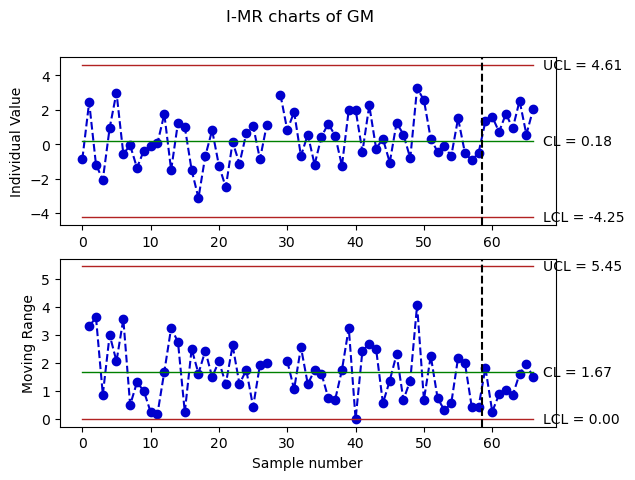

In [ ]:
data2= pd.read_csv('oxygen_phase2.csv')
# new_obs = np.array((1.327, 1.594, 0.716, 1.767, 0.915, 2.524, 0.563, 2.053))            # Define the array with the new observations

new_data = pd.concat([data, pd.DataFrame(new_obs, columns=['NameCol1','NameCol2'])], ignore_index=True)  # Add the new observations to the dataset
new_data.tail(10)

# ADD COLUMN TO A NEW OBS DATASET
for i in range(10):                                             # 10: number of new obs
    new_data['layer'].iloc[100+i]=101+i                         # ID column; 100 is the number of observations of the first dataset
    new_data['lag1'].iloc[100+i]=new_data['val'].iloc[99+i]
    new_data['dummy'].iloc[100+i]=0                             # In case of dummy
    data.loc[40+i,'th-t']=(data.loc[40+i,'th']**lmbda-1)/lmbda  # In case of Box-Cox

# COMPUTE THE RESIDUALS OF THE NEW DATASET
new_data['res'] = new_data['val']-(3353.208-21.459*new_data['layer']+0.458*new_data['lag1']-1587.609*new_data['dummy']) # To change with the model used in the particular case
new_data['res'][100:]

# IMR CHART
new_data_IMR = qda.ControlCharts.IMR(new_data, 'NameCol', subset_size=len(data)) # subset_size: specify the number of observations to be used for the computation of the control limits

In [ ]:
# COULD NEED
    data.loc[40+i,'res']=data.loc[40+i,'data norm']-1.702 +0.021 *data.loc[40 + i,'t']
    data.loc[40+i,'MR']=abs(data.loc[40+i,'res']-data.loc[39 + i,'res'])
    data.loc[40+i,'I_CL']=1.702-0.021*data.loc[40+i,'t']
    data.loc[40+i,'I_UCL']=1.702-0.021*data.loc[40+i,'t']+K_alpha* data['MR'][0:40].mean() / d2  
    data.loc[40+i,'I_LCL']=1.702-0.021*data.loc[40+i,'t']-K_alpha* data['MR'][0:40].mean() / d2  
data.head()

##### Method B
-> We re built the model defining itself

In [ ]:
#if we made a model on the first data and we want to keep going
new_obs['Intercept'] = 1
new_obs['dummy'] = np.zeros(len(new_obs))
new_obs['dummy'][:] = 1
new_obs['t'] = np.arange(1, len(new_obs)+1)

coeff =model.params #model is the model we did before

y_pred_manual = (
    coeff['const'] * new_obs['Intercept'] +
    coeff['dummy'] * new_obs['dummy'] +
    coeff['t'] * new_obs['t'] 
)

residui = new_obs['residuals'] - y_pred_manual
residui_new1 = pd.DataFrame({'residuals':residui})

##### Method C
-> We make another model, but we keep the residuals

In [ ]:
#OLS model
x = data2['Repeated']
x = sm.add_constant(x)
y = data2['value']
model = sm.OLS(y,x).fit()
# Print the model summary
qda.summary(model)

# Make a new dataframe for the new residuals
df_res = pd.DataFrame({'res': model.resid})
# Create the IMR chart
df_res = qda.ControlCharts.IMR(df_res, 'res', K = K_alpha,  subset_size=len(data_stack))

### Xbar - S Transformed Data

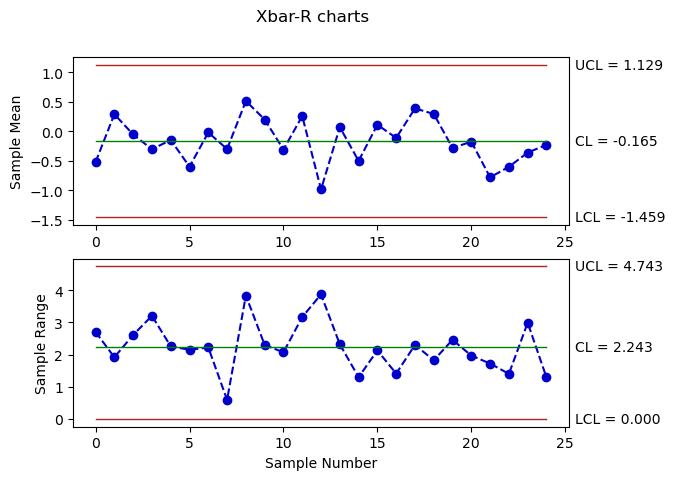

In [ ]:
# After the Box-Cox transformation (data_norm as output)
data_BC_unstack = data_norm.reshape(data.shape)                               # First we need to unstack the data
data_BC_unstack = pd.DataFrame(data_BC_unstack, columns = data.columns)       # and convert it to a DataFrame

data_BC_unstack.head()                                                        # Print out the transformed data

# X-bar and R charts
data_BC_XR = qda.ControlCharts.XbarR(data_BC_unstack)

In [ ]:
# X-bar and S charts
data_BC_XS = qda.ControlCharts.XbarS(data_BC_unstack)

In [ ]:
# WE need to apply the mean and std functions to each row of the data frame
data_XS = data_BC_unstack.copy()                        # Make a copy of the data
data_XS['sample_mean'] = data_BC_unstack.mean(axis=1)   # Add a column with the mean of the rows
data_XS['sample_std'] = data_BC_unstack.std(axis=1)     # Add a column with the range of the rows

data_XS.head()                                          # Inspect the dataset


# Grand Mean and Mean of std deviations
Xbar_mean = data_XS['sample_mean'].mean()
S_mean = data_XS['sample_std'].mean()
print('Mean of the sample mean: %.3f' % Xbar_mean)
print('Mean of the sample range: %.3f' % S_mean)

n = 5
K = 3
A3 = K * 1 / (qda.constants.getc4(n) * np.sqrt(n))
B3 = np.maximum(1 - K * (np.sqrt(1-qda.constants.getc4(n)**2)) / (qda.constants.getc4(n)), 0)
B4 = 1 + K * (np.sqrt(1-qda.constants.getc4(n)**2)) / (qda.constants.getc4(n))
# Now we can compute the CL, UCL and LCL for Xbar and S
data_XS['Xbar_CL'] = Xbar_mean
data_XS['Xbar_UCL'] = Xbar_mean + A3 * S_mean
data_XS['Xbar_LCL'] = Xbar_mean - A3 * S_mean
data_XS['S_CL'] = S_mean
data_XS['S_UCL'] = B4 * S_mean
data_XS['S_LCL'] = B3 * S_mean
data_XS.head()# Inspect the dataset

data_XS['Xbar_TEST1'] = np.where((data_XS['sample_mean'] > data_XS['Xbar_UCL']) | 
                (data_XS['sample_mean'] < data_XS['Xbar_LCL']), data_XS['sample_mean'], np.nan)
data_XS['S_TEST1'] = np.where((data_XS['sample_std'] > data_XS['S_UCL']) | 
                (data_XS['sample_std'] < data_XS['S_LCL']), data_XS['sample_std'], np.nan)

# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XS['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['Xbar_UCL'], color='r')
plt.plot(data_XS['Xbar_CL'], color='g')
plt.plot(data_XS['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XS['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

# Plot the S chart
plt.title('S chart')
plt.plot(data_XS['sample_std'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['S_UCL'], color='r')
plt.plot(data_XS['S_CL'], color='g')
plt.plot(data_XS['S_LCL'], color='r')
plt.ylabel('Sample S')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['S_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['S_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['S_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['S_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XS['S_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

### I-MR with different K & using the half-normal approximation

> Let's redesign the MR control chart by using the half-normal approximation first:
> - $UCL = D_{1-\alpha/2} \frac{\bar{MR}}{d_2}$
> - $LCL = D_{\alpha/2} \frac{\bar{MR}}{d_2}$
>
> For $n=2$ (Alwan, Appendix A):
> - $D_{1-\alpha/2} = \sqrt{2} z_{alpha/4}$
> - $D_{\alpha/2} = \sqrt{2} z_{1/2 - alpha/4}$

In [ ]:
# DEFINE ALPHA
alpha = 0.01
K_alpha = stats.norm.ppf(1-alpha/2)
print('New K value = %.3f' % K_alpha)

# CREATE THE CONTROL CHART
data_IMR = qda.ControlCharts.IMR(data, 'NameCol', K = K_alpha)
# REDESIGN THE CC
D_UCL = np.sqrt(2) * stats.norm.ppf(1-alpha/4)
D_LCL = np.sqrt(2) * stats.norm.ppf(1 - (1/2 - alpha/4))
MR_UCL = D_UCL * data_IMR['MR'].mean()/qda.constants.getd2(2)
MR_LCL = D_LCL * data_IMR['MR'].mean()/qda.constants.getd2(2)
print('MR_UCL = %.4f' % MR_UCL)
print('MR_LCL = %.4f' % MR_LCL)

# PLOT
data_IMR['MR_TEST1'] = np.where((data_IMR['MR'] > MR_UCL) | 
                                (data_IMR['MR'] < MR_LCL), data_IMR['MR'], np.nan)

plt.plot(data_IMR['MR'], 'o-')
plt.axhline(MR_UCL, color = 'r')
plt.axhline(MR_LCL, color = 'r')
plt.plot(data_IMR['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

In [ ]:
# Extract the 'MR' column   
MR = pd.DataFrame(data_IMR['MR'])
# Get the index of the value equal to 0
idx = MR[MR['MR'] == 0].index[0]
# Change it to NaN
MR['MR'].iloc[idx] = np.nan
# Transform the data
MR['MR'] = MR['MR'].transform(lambda x: ((x**0.4)))
# Replace the NaN value with 0
MR['MR'].iloc[idx] = 0

In [ ]:
# We can use the Shapiro-Wilk test
data_MR_transformed_dropna = MR.dropna()
_, p_value_SW = stats.shapiro(data_MR_transformed_dropna['MR'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_MR_transformed_dropna['MR'], dist="norm", plot=plt)
plt.show()

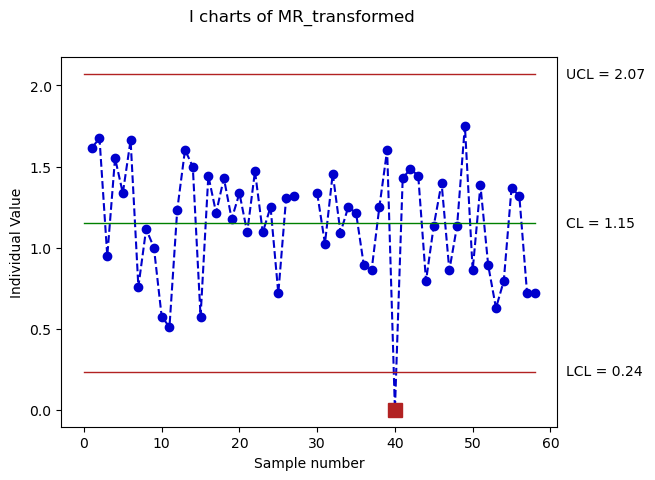

In [ ]:
# Change the name of the column in MR to 'MR_transformed'
MR = MR.rename(columns = {'MR': 'MR_transformed'})
data_MR_transformed = qda.ControlCharts.IMR(MR, 'MR_transformed', K = K_alpha, plotit = False)

# Plot the I chart with the transformed data
fig, ax = plt.subplots(1, 1)
fig.suptitle(('I charts of MR_transformed'))
ax.plot(data_MR_transformed['MR_transformed'], color='mediumblue', linestyle='--', marker='o')
ax.plot(data_MR_transformed['I_UCL'], color='firebrick', linewidth=1)
ax.plot(data_MR_transformed['I_CL'], color='g', linewidth=1)
ax.plot(data_MR_transformed['I_LCL'], color='firebrick', linewidth=1)
ax.set_ylabel('Individual Value')
ax.set_xlabel('Sample number')
# add the values of the control limits on the right side of the plot
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(data_MR_transformed['I_UCL'].iloc[0]), verticalalignment='center')
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_CL'].iloc[0], 'CL = {:.2f}'.format(data_MR_transformed['I_CL'].iloc[0]), verticalalignment='center')
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(data_MR_transformed['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
ax.plot(data_MR_transformed['I_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.show()


## Non iid-Data

Time Series

**COMMENTS**
- Time series can never be negative => LCL >= 0 always.

**HP**
- Data are Random
- Data are Normally Distributed

### Check HP

In [ ]:
# PLOT
plt.plot(data['time'], color='b', linestyle='--', marker='o')

# CORRELATION - PLOT ACF & PACF
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['time'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['time'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

# RANDOMNESS - Runs Test
from statsmodels.sandbox.stats.runs import runstest_1samp
_, pval_runs = runstest_1samp(data['time'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# pval < 5% => NO RANDOM

# NORMALITY
# shapiro
_, pval_SW = stats.shapiro(data['time'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)
# qq plot
stats.probplot(data['time'], dist="norm", plot=plt)
plt.show()

- If the model is random we can fit a model => data re iid
- If HP are not verified =>

#### Trend Model
-> Trend in the data, Randomness not verified, Normality verified

=> Fit a linear regression model

In [ ]:
# Add a column with the sample number to use as regressor
data['t'] = np.arange(1, len(data)+1)
data.head()

# Fit a regression model to the data
import statsmodels.api as sm
# Fit the linear regression model
x = data['t']               # store regression and regressors.
x = sm.add_constant(x)      
y = data['time']            # what we want to model, the time
model = sm.OLS(y,x).fit()
# Print the model summary
qda.summary(model)

Now that we have a trend model, we can check if the assumptions on the **residuals are met (randomness and normality)**.

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

#AUTOCORRELATION
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

### CC for a Trend Model

A trend CC will be based on the residuals of the trend model.

> $$UCL = \beta_0 + \beta_1 \cdot t + 3 \frac{\bar{MR}}{d_2 (2)}$$
> $$CL = \beta_0 + \beta_1 \cdot t$$
> $$LCL = \beta_0 + \beta_1 \cdot t - 3 \frac{\bar{MR}}{d_2 (2)}$$

We should use the MR of the residuals.

- Alwan states that the difference between the MR of the residuals and the MR of the original data is negligible, but let's use the MR of the residuals.

In [ ]:
df_res = pd.DataFrame({'I': model.resid})
df_res['MR'] = df_res['I'].diff().abs()
df_res.describe()

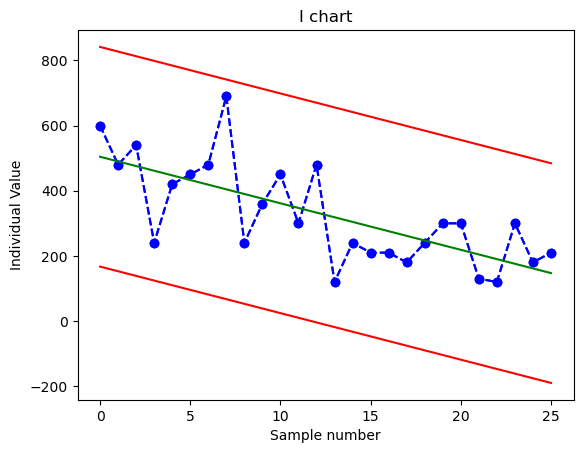

In [ ]:
# Replace the I_CL column with the fitted values
df['I_CL'] = model.fittedvalues                                 # df: is the old dataframe
# Replace the I_UCL and I_LCL columns with the upper and lower
d2 = qda.constants.getd2(2)
df['I_UCL'] = df['I_CL'] + 3 * df_res['MR'].mean() / d2
df['I_LCL'] = df['I_CL'] - 3 * df_res['MR'].mean() / d2
# Also update the TEST1 column
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | (df['I'] < df['I_LCL']), df['I'], np.nan)

# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)
plt.show()

Cut the LCL < 0

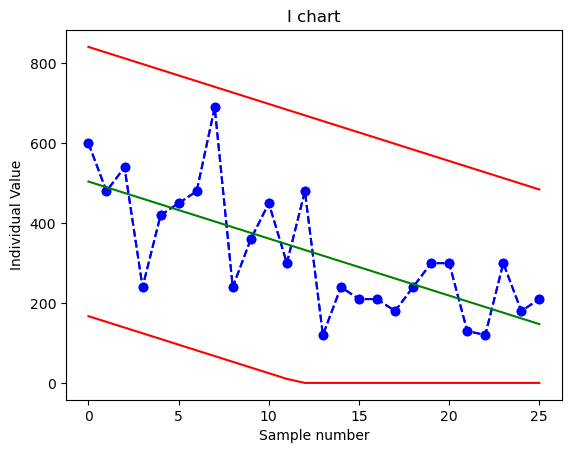

In [ ]:
df['I_LCL'] = np.where((df['I_LCL'] < 0), 0, df['I_LCL'])
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)
plt.show()

### SCC & FCV Control Charts

- I Chart: violation of the independence assumption within the sample
- MR Chart: monitoring between sample variability
- R Chart: designed before can still be used to monitor the within sample variability.

### I-MR Chart on residuals

##### With Formula

In [ ]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(model.resid, columns=['res'])
#df_SCC = pd.DataFrame({'res': model.resid})
# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

##### By Hand

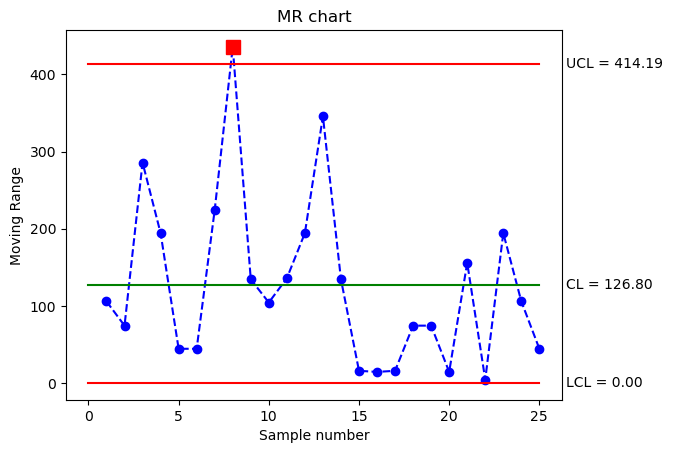

In [ ]:
df_res = pd.DataFrame({'I': model.resid})
df_res['MR'] = df_res['I'].diff().abs()
df_res.describe()
# Create columns for the upper and lower control limits
d2 = qda.constants.getd2(2)
df_res['I_UCL'] = df_res['I'].mean() + (3*df_res['MR'].mean()/d2)
df_res['I_CL'] = df_res['I'].mean()
df_res['I_LCL'] = df_res['I'].mean() - (3*df_res['MR'].mean()/d2)
df_res['MR_UCL'] = D4 * df_res['MR'].mean()
df_res['MR_CL'] = df_res['MR'].mean()
df_res['MR_LCL'] = 0
# Define columns for the Western Electric alarm rules
df_res['I_TEST1'] = np.where((df_res['I'] > df_res['I_UCL']) | 
            (df_res['I'] < df_res['I_LCL']), df_res['I'], np.nan)
df_res['MR_TEST1'] = np.where((df_res['MR'] > df_res['MR_UCL']) | 
            (df_res['MR'] < df_res['MR_LCL']), df_res['MR'], np.nan)
# Print the first 5 rows of the new dataframe
df_res.head()

# Plot the I chart
plt.title('I chart')
plt.plot(df_res['I'], color='b', linestyle='--', marker='o')
plt.plot(df_res['I'], color='b', linestyle='--', marker='o')
plt.plot(df_res['I_UCL'], color='r')
plt.plot(df_res['I_CL'], color='g')
plt.plot(df_res['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
# print the first value of the column I_UCL
plt.text(len(df_res)+.5, df_res['I_UCL'].iloc[0], 
        'UCL = {:.2f}'.format(df_res['I_UCL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['I_CL'].iloc[0], 
        'CL = {:.2f}'.format(df_res['I_CL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['I_LCL'].iloc[0], 
        'LCL = {:.2f}'.format(df_res['I_LCL'].iloc[0]), 
        verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df_res['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)
plt.show()

# MR Chart
plt.title('MR chart')
plt.plot(df_res['MR'], color='b', linestyle='--', marker='o')
plt.plot(df_res['MR_UCL'], color='r')
plt.plot(df_res['MR_CL'], color='g')
plt.plot(df_res['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df_res)+.5, df_res['MR_UCL'].iloc[0], \
         'UCL = {:.2f}'.format(df_res['MR_UCL'].iloc[0]), 
         verticalalignment='center')
plt.text(len(df_res)+.5, df_res['MR_CL'].iloc[0], 
        'CL = {:.2f}'.format(df_res['MR_CL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['MR_LCL'].iloc[0], 
        'LCL = {:.2f}'.format(df_res['MR_LCL'].iloc[0]), 
        verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df_res['MR_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)
plt.show()

#### Method 2

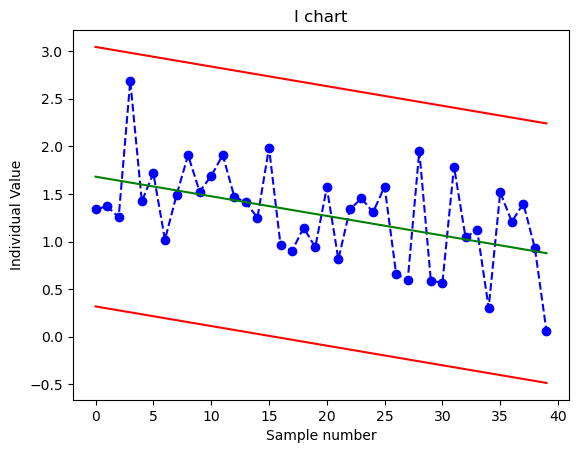

In [ ]:
df_res = pd.DataFrame({'I': model2.resid})
df_res['MR'] = df_res['I'].diff().abs()
data['res']  = df_res['I']
data['MR']   = data['res'].diff().abs()
data.head()

# Let's reuse the old dataframe df
# Replace the I_CL column with the fitted values
data['I_CL'] = model2.fittedvalues

# Replace the I_UCL and I_LCL columns with the upper and 
# lower control limits computed from the formula
d2 = qda.constants.getd2(2)
data['I_UCL'] = data['I_CL'] + K_alpha * data['MR'].mean() / d2
data['I_LCL'] = data['I_CL'] - K_alpha* data['MR'].mean() / d2

# Plot the I chart
plt.title('I chart')
plt.plot(data['NameCol'], color='b', linestyle='--', marker='o')
plt.plot(data['I_UCL'], color='r')
plt.plot(data['I_CL'], color='g')
plt.plot(data['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')

plt.show()

#### Dummy Variable
Assuming that we found an assignable cause for the OOC observation 8

> We need to redesign the control charts by inserting a DUMMY VARIABLE such that:
> - $dummy = 0$ for $t \neq 8$
> - $dummy = 1$ for $t = 8$

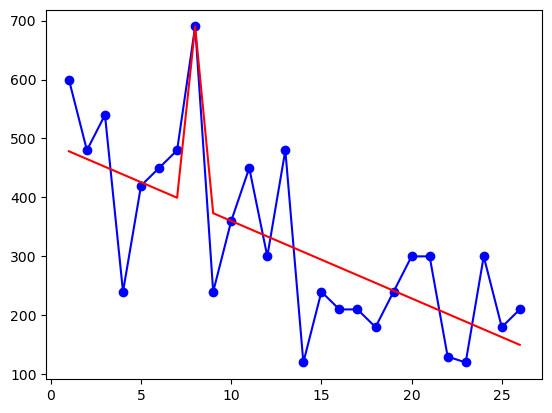

In [ ]:
# Create the dummy variable X
data['dummy'] = np.where((data['t'] == 8) | (data['t'] == 16), 1, 0)
data.head()

# Fit a model
x = data[['var1', 'dummy']] # It contains all the variables we want to use in the linear regression
x = sm.add_constant(x)
y = data['time']
model2 = sm.OLS(y,x).fit()
qda.summary(model2)
# PLOT of FITTED
plt.plot(data['var1'], data['time'], color='b', linestyle='-', marker='o')
plt.plot(data['var1'], model2.fittedvalues, color='r')
plt.show()

##### Way 2
-> data_stack is a dataset with all the observations in a column

In [ ]:
n = len(data_stack)                             # Lunghezza del DataFrame
repeating_numbers = []                          # Inizializziamo una lista vuota per i numeri che si ripetono
for i in range(n):                              # Utilizziamo un ciclo for per popolare la lista con i numeri che si ripetono da 1 a 4
    repeating_numbers.append((i % 4) + 1)
data_stack['Repeated'] = repeating_numbers      # Aggiungiamo la lista come nuova colonna nel DataFrame
print(data_stack)

Dummy = []                                      # Inizializziamo una lista vuota per la nuova colonna
for value in data_stack['Repeated']:            # Utilizziamo un ciclo for per popolare la nuova colonna
    if value == 1:
        Dummy.append(1)
    else:
        Dummy.append(0)
data_stack['Dummy'] = Dummy                      # Aggiungiamo la lista come nuova colonna nel DataFrame
print(data_stack)

#### Check Residual's Assumptions

Shapiro-Wilk test p-value on the residuals = 0.530


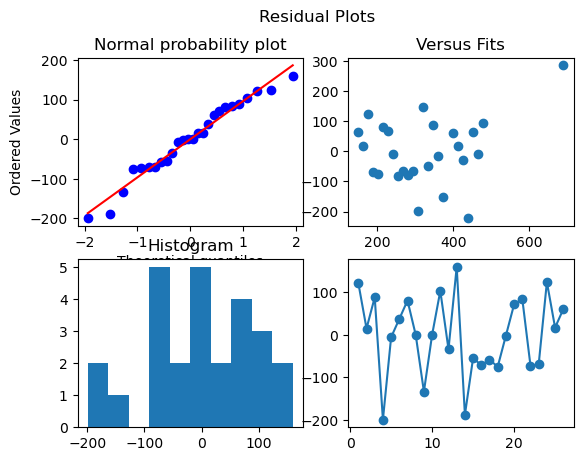

In [ ]:
# NORMALITY
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model2.resid, dist="norm", plot=axs[0,0])    # model2 is the fitted model with dummy variable of chapter before
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model2.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model2.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model2.resid)+1), model2.resid, 'o-')
_, pval_SW_res = stats.shapiro(model2.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

# AUTOCORRELATION
_, pval_runs_res = runstest_1samp(model2.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model2.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
sgt.plot_pacf(model2.resid, lags = int(len(data)/3), zero=False, ax=ax[1],
            method = 'ywm')
plt.show()

# SCC CC on RESIDUALS
# Make a new dataframe for the new residuals
df_res2 = pd.DataFrame({'res2': model2.resid})
# Create the IMR chart
df_res2 = qda.ControlCharts.IMR(df_res2, 'res2')

##### Interval Prediction

Using the model estimated before, design an intervale prediction for the popularity index to be expected next week.

In [ ]:
last_lag = data['Index'].iloc[-2] # We are choosing second-last value
print('Last Lag= %.3f' % last_lag)

# Predict the next value
Yhat = model.predict([1, 41, last_lag,0])
print('Next process outcome = %.3f' % Yhat)

Last Lag= 3.610
Next process outcome = 29.187


/var/folders/52/gfc1s2zs2z93vlghjfmnj2sm0000gn/T/ipykernel_5277/3569928347.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Next process outcome = %.3f' % Yhat)


-> .iloc[-2]: last value might be reserved for validation or because of the way the time series data is structured.



In [ ]:
prediction_df = model.get_prediction([1, 41, last_lag,0]).summary_frame(alpha=0.05)
print(prediction_df)

      mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  29.1868   4.3318        20.3929        37.9808       20.3925       37.9812


#### I-MR-R CC:
-> Characteristics:
1. The I Chart allows moniotring the mean of the process treating sample means as individual observations
2. The MR Chart allows monitoring the **between** sample variability
3. The MR Chart allows monitoring the **within** sample variability

In [ ]:
data_XR = qda.ControlCharts.XbarR(data)
# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')
# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


#### FVC, Fitted Value Chart

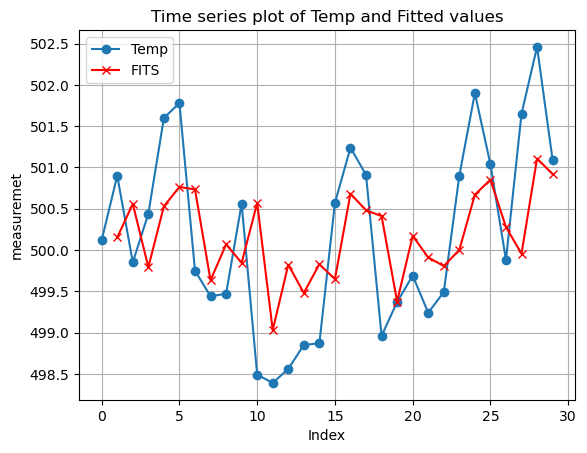

In [ ]:
# FVC - Fitted Value Chart
plt.plot(data['NameCol'], 'o-', label = 'Temp')
plt.plot(model.fittedvalues, 'x-r', label = 'FITS')
plt.xlabel('Index')
plt.ylabel('measuremet')
plt.legend()
plt.title('Fitted Value Chart')
plt.grid()
plt.show()

# Multivariate

## HP Check

-> marginal normality is assumed as a sufficient condition for multivariate normality

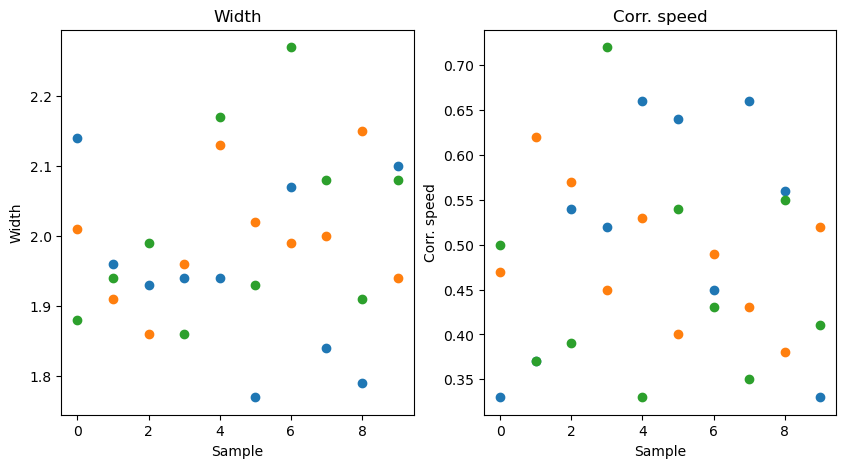

In [ ]:
# Extract the stacked array
Width = data[['Width1', 'Width2', 'Width3']]
Corr_speed = data[['Corr.speed1', 'Corr.speed2', 'Corr.speed3']]

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(Width, 'o')
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Width')
ax[0].set_title('Width')
ax[1].plot(Corr_speed, 'o')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Corr. speed')
ax[1].set_title('Corr. speed')
plt.show()

In [ ]:
# Perform the Shapiro-Wilk test on the NameCol
_, pval1_SW = stats.shapiro(NameCol.stack())
print('Shapiro-Wilk test on NameCol p-value = %.3f' % pval1_SW)

# Plot the qqplot
stats.probplot(NameCol.stack(), dist="norm", plot=plt)
plt.show()

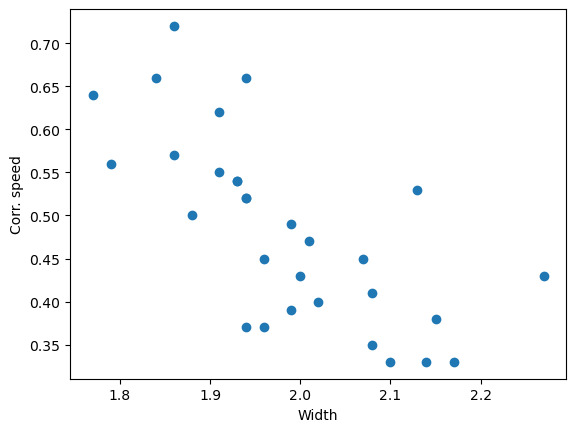

In [ ]:
# Plot the data
plt.scatter(NameCol1, NameCol2)
plt.xlabel('NameCol1')
plt.ylabel('NameCol2')
plt.show()

## Hotelling's CC

In [ ]:
# GRAND MEAN VECTOR:
# Create a new dataframe to store the sample mean
sample_mean = pd.DataFrame()
sample_mean['NameCol1'] = NameCol1.mean(axis=1)
sample_mean['NameCol2'] = NameCol2.mean(axis=1)
# Calculate the grand mean
Xbarbar = sample_mean.mean()
print(Xbarbar)

# VARIANCE/COVARIANCE MATRIX:
# Create a new dataframe to store the stacked data
data_stack = pd.DataFrame()
data_stack[['sample', 'NameCol1']] = NameCol1.transpose().melt()
data_stack['NameCol2'] = NameCol2.transpose().melt()['value']
data_stack.head(9)

# Compute the variance and covariance matrix of each group (sample)
cov_matrix = data_stack.groupby('sample').cov()
cov_matrix.head(8)

In [ ]:
# Compute the mean covariance matrix
S = cov_matrix.groupby(level=1).mean()
print(S)

# Reorder the indeces of S to match the order of the columns get the names of the columns
cols = S.columns.tolist()
S = S.reindex(columns=cols, index=cols)
print(S)

In [ ]:
# COTROL LIMITS
p = 2           # number of random variables
m = 10          # number of samples
n = 3           # number of replicates (sample size)
alpha = 0.05    # significance level
UCL = (p * (m-1) * (n-1)) / (m * (n-1) - (p-1)) * stats.f.ppf(1-alpha, p, m*n - m + 1 - p)
print('UCL = %.3f' % UCL)

# EVALUATION of the Hotelling T2 STATISTIC
# Calculate the Hotelling T2 statistic for the 9th sample
index = 8
S_inv = np.linalg.inv(S)        # Inverse of the covariance matrix
T2 = n * (sample_mean.iloc[index]-Xbarbar).transpose().dot(S_inv).dot(sample_mean.iloc[index]-Xbarbar)
print('\nThe Hotelling T2 statistic for the sample number %d is: %.3f' % (index + 1, T2))

In [ ]:
# Calculate the Hotelling T2 statistic for all the samples
T2 = []
for i in range(m):
    T2.append(n * (sample_mean.iloc[i]-Xbarbar).transpose().dot(S_inv).dot(sample_mean.iloc[i]-Xbarbar))

# Plot the Hotelling T2 statistic
plt.plot(T2, 'o-')
plt.plot([0, m], [UCL, UCL], 'r-')
plt.plot([0, m], [np.median(T2), np.median(T2)], 'g-')
plt.xlabel('Sample')
plt.ylabel('Hotelling T2')
plt.show()

In [ ]:
# Calculate the UCL of the Hotelling's T2 statistic
UCL = stats.chi2.ppf(1-alpha, p)
print("UCL = %.4f" % UCL)

Assuming a new Number of Sample:
> $$ UCL = c_2 (m,n,p) F_\alpha (p, m(n-1) - (p-1)) $$
> where $c_2$ is a constant that depends on $m$, $n$ and $p$:
> $$ c_2 (m,n,p) = \frac{p(n-1)(m+1)}{m(n-1)-(p-1)}$$

In [ ]:
m = 20          # number of samples
c2 = (p*(n-1)*(m+1))/(m*(n-1)-(p-1))
UCL_new = c2*stats.f.ppf(1-alpha, p, (m*(n-1)-(p-1)))
print("New UCL = %.4f" % UCL_new)

### From Exercises

In [ ]:
p = 2           # number of random variables
m = len(data)   # number of samples
n = 3           # number of replicates (sample's size)
alpha = 0.05
# MEAN
Xbar = data.mean()
print(Xbar)

**MATRIXES**

-> For n > 1 => we use VARIANCE/COVARIANCE MATRIX (makes the mean of the variances/covariances of each sample)

-> For n = 1 =>
- V matrix is preferred: more sensible to changes
- Long  term estimator of the variance ( S = data.cov() )


In [ ]:
# IF n ≠ 1 => VARIANCE/COVARIANCE MATRIX
cov_matrix = data.cov()
S = cov_matrix.groupby(level=0).mean()
cols = S.columns.tolist()
S1 = S.reindex(columns = cols, index = cols)
print(S1)
S1_inv = np.linalg.inv(S1)

In [ ]:
# IF n = 1 Create the V matrix
V = data.diff().dropna()
# Calculate the short range estimator S1
S1 = 1/2 * V.transpose().dot(V) / (m-1)
# Display the short range estimator
print("The short range estimator is: \n", S1)
S1_inv = np.linalg.inv(S1)

In [ ]:
data_CC = data.copy()
# HOTELLING
data_CC['T2'] = np.nan
for i in range(m):
    data_CC['T2'].iloc[i] = n * (data.iloc[i] - Xbar).transpose().dot(S1_inv).dot(data.iloc[i] - Xbar)
# Now we can add the UCL, CL and LCL to the data_CCframe
data_CC['T2_UCL'] = ((m-1)**2)/m*stats.beta.ppf(1 - alpha, p/2, (m-p-1)/2)
data_CC['T2_CL'] = data_CC['T2'].median()
data_CC['T2_LCL'] = 0
#LCL is for phase 1
# Add one column to test if the sample is out of control
data_CC['T2_TEST'] = np.where((data_CC['T2'] > data_CC['T2_UCL']), data_CC['T2'], np.nan)
# Inspect the data_CCset
data_CC.head()
plt.title('T2 control chart')
plt.plot(data_CC['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC['T2_UCL'], color='r')
plt.plot(data_CC['T2_CL'], color='g')
plt.plot(data_CC['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_CC)+.5, data_CC['T2_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_CC['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC)+.5, data_CC['T2_CL'].iloc[0], 'median = {:.3f}'.format(data_CC['T2_CL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_CC['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

-> **MULTIVARIATE AFTER PCA** 

1. Create a dataset with the scores

=> You will substituite *new data* to *data* dataset in the next lines of code.

In [ ]:
new_data = pd.DataFrame()
new_data = scores_df[['z1','z2']]

2. Consider the random variables as the scores and the sample size n = 1

In [ ]:
p = 2           # number of random variables
m = len(new_data)   # number of samples
n = 1           # number of replicates (sample's size)
alpha = 0.01

# MEAN
Xbar = new_data.mean()
print(Xbar)

## Control Region for a ARL(0) larger or equal to 500

In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

# Define the parameters
ARL = 500
p = 3           # number of random variables
n = 25          # number of replicates (sample


In [ ]:
# Calculate the Z 
alpha_FAM = 1 / ARL
alpha = alpha_FAM / p
Zalpha = norm.ppf(1-alpha/2)

print("alpha_FAM = %f " % alpha_FAM)
print("alpha = %f " % alpha)
print("Z alpha/2 = %.3f " % Zalpha)

In [ ]:
# Compute the control limits of the variable x CC
UCL_x = mu_x + Zalpha*np.sqrt(var_x)/np.sqrt(n)
CL_x = mu_x
LCL_x = mu_x - Zalpha*np.sqrt(var_x)/np.sqrt(n)

# CUSUM & EWMA

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{5}} = 0.4472 $$
$$ \mu_0 = \bar{\bar{x}} = 11.113 $$

### CUSUM
Design the CUSUM control chart. Remember:
- $ C_i^+ = \max(0, \bar{x}_i - (\mu_0 + K) + C_{i-1}^+) $
- $ C_i^- = \max(0, (\mu_0 - K) - \bar{x}_i + C_{i-1}^-) $
- $ H = h \cdot \sigma_{\bar{x}} = 4 \cdot 0.4472 = 1.7889 $
- $ K = k \cdot \sigma_{\bar{x}} = 0.5 \cdot 0.4472 = 0.2236 $

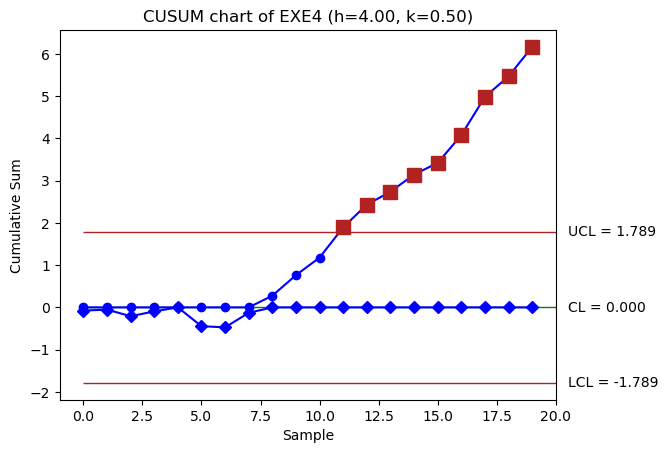

In [ ]:
# FUNCTION WITH MEAN GIVEN
n = 5
sigma = 1
sigma_xbar = sigma/np.sqrt(n)
xbarbar = data['NameCol'].mean()
h = 4
k = 0.5
df_CUSUM = qda.ControlCharts.CUSUM(data, 'NameCol', params=(h,k), mean = 10.75, sigma_xbar = sigma_xbar)  # CHANGE THE MEAN

In [ ]:
# Additional data of phase 2:
stdev = 3.4914                      # Choose it
phase1_size = len(data)
print(phase1_size)
data_mean = pd.DataFrame(data_XS['sample_mean']) # extract the sample_mean column from data_XS and put it in a new dataframe
data_CUSUM = qda.ControlCharts.CUSUM(data_mean, 'sample_mean', params=(h,k), mean = mean, sigma_xbar = stdev/np.sqrt(n), subset_size=phase1_size)

In [ ]:
n = 5
sigma = 1
sigma_xbar = sigma/np.sqrt(n)
xbarbar = data['NameCol'].mean()

# make a copy of the data
df = data.copy()
# change the name of the column time to I
df.rename(columns={'NameFile':'I'}, inplace=True)

# Create columns for the upper and lower control limits
df['I_UCL'] = xbarbar + 3*sigma_xbar
df['I_CL'] = xbarbar
df['I_LCL'] = xbarbar - 3*sigma_xbar

# Print the first 5 rows of the new dataframe
df.head()

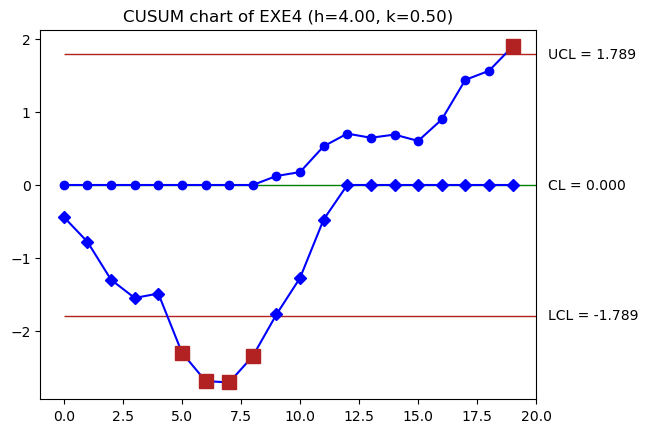

In [ ]:
# By Hand
col_name = 'NameCol'

h = 4
k = 0.5

H = h*sigma_xbar
K = k*sigma_xbar

df_CUSUM = data.copy()
df_CUSUM['Ci+'] = 0.0
df_CUSUM['Ci-'] = 0.0
for i in range(len(df_CUSUM)):
    if i == 0:
        df_CUSUM.loc[i, 'Ci+'] = max(0, df_CUSUM.loc[i, col_name] - (xbarbar + K))
        df_CUSUM.loc[i, 'Ci-'] = max(0, (xbarbar - K) - df_CUSUM.loc[i, col_name])
    else:
        df_CUSUM.loc[i, 'Ci+'] = max(0, df_CUSUM.loc[i, col_name] - (xbarbar + K) + df_CUSUM.loc[i-1, 'Ci+'])
        df_CUSUM.loc[i, 'Ci-'] = max(0, (xbarbar - K) - df_CUSUM.loc[i, col_name] + df_CUSUM.loc[i-1, 'Ci-'])

df_CUSUM['Ci+_TEST1'] = np.where((df_CUSUM['Ci+'] > H) | (df_CUSUM['Ci+'] < -H), df_CUSUM['Ci+'], np.nan)
df_CUSUM['Ci-_TEST1'] = np.where((df_CUSUM['Ci-'] > H) | (df_CUSUM['Ci-'] < -H), df_CUSUM['Ci-'], np.nan)

# Plot the control limits
plt.hlines(H, 0, len(df_CUSUM), color='firebrick', linewidth=1)
plt.hlines(0, 0, len(df_CUSUM), color='g', linewidth=1)
plt.hlines(-H, 0, len(df_CUSUM), color='firebrick', linewidth=1)
# Plot the chart
plt.title('CUSUM chart of %s (h=%.2f, k=%.2f)' % (col_name, h, k))
plt.plot(df_CUSUM['Ci+'], color='b', linestyle='-', marker='o')
plt.plot(-df_CUSUM['Ci-'], color='b', linestyle='-', marker='D')
# add the values of the control limits on the right side of the plot
plt.text(len(df_CUSUM)+.5, H, 'UCL = {:.3f}'.format(H), verticalalignment='center')
plt.text(len(df_CUSUM)+.5, 0, 'CL = {:.3f}'.format(0), verticalalignment='center')
plt.text(len(df_CUSUM)+.5, -H, 'LCL = {:.3f}'.format(-H), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df_CUSUM['Ci+_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.plot(-df_CUSUM['Ci-_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.xlim(-1, len(df_CUSUM))
plt.show()

### EWMA
Design the EWMA control chart. Remember:
- $ z_0 = \bar{\bar{x}} = 11.113 $
- $ z_i = \lambda \cdot \bar{x}_i + (1 - \lambda) \cdot z_{i-1} $
- $ a_t = \frac{\lambda}{2-\lambda} \cdot [1 - (1 - \lambda)^{2t}] $

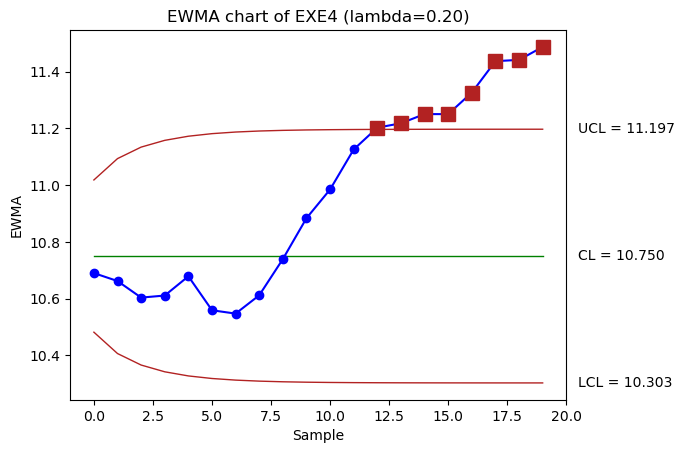

In [ ]:
sigma_xbar = sigma/np.sqrt(n)
lambda_ = 0.2
df_EWMA = qda.ControlCharts.EWMA(data, 'NameCol', lambda_, 10.75, sigma_xbar)       # µ=10.75

In [ ]:
# Phase 2 Data
data_EWMA = qda.ControlCharts.EWMA(data_mean, 'sample_mean', params=(lambda_), mean = mean, sigma_xbar = stdev/np.sqrt(n), subset_size=phase1_size)

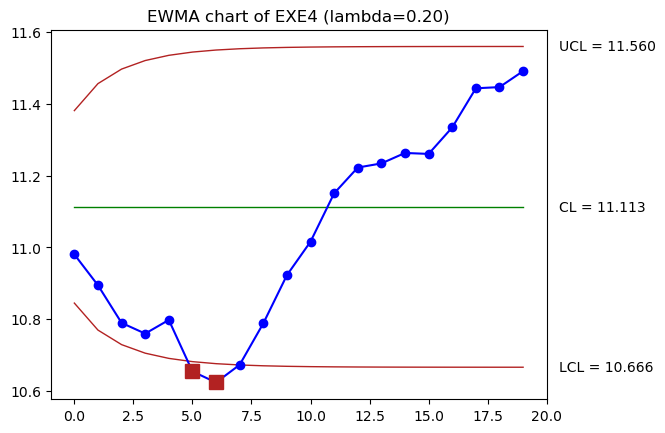

In [ ]:
col_name = 'NameCol'
lambda_ = 0.2

df_EWMA = data.copy()
df_EWMA['a_t'] = lambda_/(2-lambda_) * (1 - (1-lambda_)**(2*np.arange(1, len(df_EWMA)+1)))
for i in range(len(df_EWMA)):
    if i == 0:
        df_EWMA.loc[i, 'z'] = lambda_*df_EWMA.loc[i, col_name] + (1-lambda_)*xbarbar
    else:
        df_EWMA.loc[i, 'z'] = lambda_*df_EWMA.loc[i, col_name] + (1-lambda_)*df_EWMA.loc[i-1, 'z']
df_EWMA['UCL'] = xbarbar + 3*sigma_xbar*np.sqrt(df_EWMA['a_t'])
df_EWMA['CL'] = xbarbar
df_EWMA['LCL'] = xbarbar - 3*sigma_xbar*np.sqrt(df_EWMA['a_t'])

df_EWMA['z_TEST1'] = np.where((df_EWMA['z'] > df_EWMA['UCL']) | (df_EWMA['z'] < df_EWMA['LCL']), df_EWMA['z'], np.nan)

# Plot the control limits
plt.plot(df_EWMA['UCL'], color='firebrick', linewidth=1)
plt.plot(df_EWMA['CL'], color='g', linewidth=1)
plt.plot(df_EWMA['LCL'], color='firebrick', linewidth=1)
# Plot the chart
plt.title('EWMA chart of %s (lambda=%.2f)' % (col_name, lambda_))
plt.plot(df_EWMA['z'], color='b', linestyle='-', marker='o')
# add the values of the control limits on the right side of the plot
plt.text(len(df_EWMA)+.5, df_EWMA['UCL'].iloc[-1], 'UCL = {:.3f}'.format(df_EWMA['UCL'].iloc[-1]), verticalalignment='center')
plt.text(len(df_EWMA)+.5, df_EWMA['CL'].iloc[-1], 'CL = {:.3f}'.format(df_EWMA['CL'].iloc[-1]), verticalalignment='center')
plt.text(len(df_EWMA)+.5, df_EWMA['LCL'].iloc[-1], 'LCL = {:.3f}'.format(df_EWMA['LCL'].iloc[-1]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df_EWMA['z_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.xlim(-1, len(df_EWMA))
plt.show()

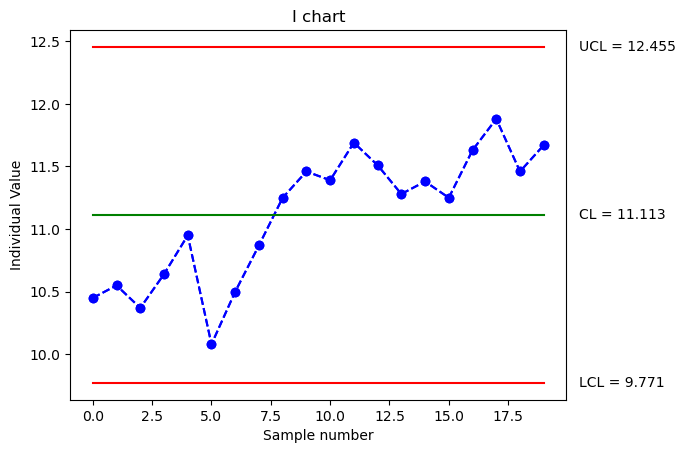

In [ ]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.3f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.3f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.3f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
plt.show()

# From the exercises

### Testing Variance
Is the assumed value of 𝜎𝑋𝑏𝑎𝑟 appropriate to this process data? Justify with a statistical test, if needed.

In [ ]:
# S^2 ESTIMATION

# Calculate the sample variance
s_squared = np.var(data, ddof=1)  # ddof=1 to get the sample variance
# Output the sample variance
print(s_squared)

s2 = 0.0071304
n = 24

Xbar          7.130435e-03
Xbar_UCL      2.107288e-28
Xbar_CL       2.107288e-28
Xbar_LCL      1.185349e-28
Xbar_TEST1             NaN
dtype: float64


/opt/anaconda3/envs/qda_environment_MAC/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
# SETTING
observations = pd.DataFrame(data['Xbar'])
s_squared = s2 
n = len(observations)  # Sample size

alpha = 0.05
df = n - 1  # degrees of freedom

# Calculate the chi-square test statistic
chi_squared_statistic = (n - 1) * s_squared / std**2

# Calculate the critical values from the chi-square distribution
critical_value_low = stats.chi2.ppf(alpha / 2, df)
critical_value_high = stats.chi2.ppf(1 - alpha / 2, df)

# Calculate the p-value
p_value = 2 * min(stats.chi2.cdf(chi_squared_statistic, df), 1 - stats.chi2.cdf(chi_squared_statistic, df))

# Output the results
print(f"Sample variance (s^2): {s_squared:.5f}")
print(f"Chi-squared statistic: {chi_squared_statistic:.5f}")
print(f"Critical value (low): {critical_value_low:.2f}")
print(f"Critical value (high): {critical_value_high:.2f}")
print(f"P-value: {p_value:.3f}")

if chi_squared_statistic < critical_value_low or chi_squared_statistic > critical_value_high:
    print("Reject the null hypothesis: The known variance is not appropriate.")
else:
    print("Fail to reject the null hypothesis: The known variance is appropriate.")

Sample variance (s^2): 0.00713
Chi-squared statistic: 3.38841
Critical value (low): 11.69
Critical value (high): 38.08
P-value: 0.000
Reject the null hypothesis: The known variance is not appropriate.


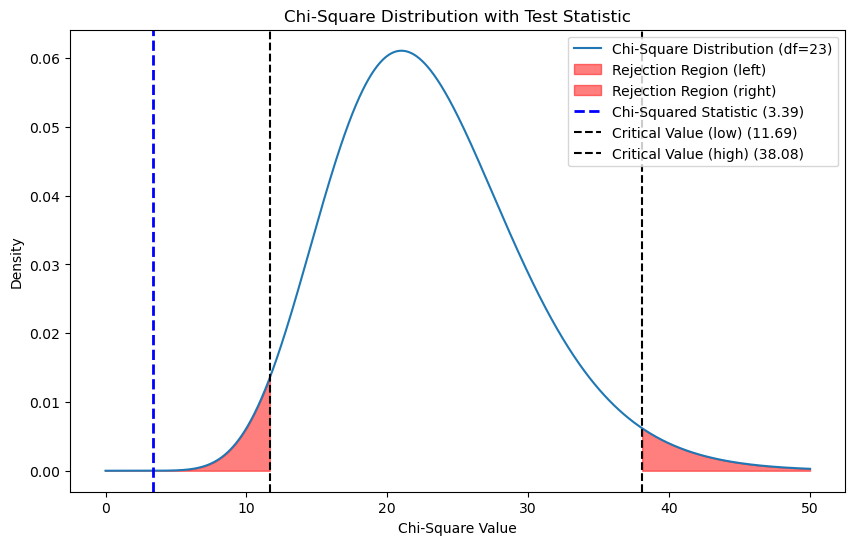

In [ ]:
# Plotting the chi-square distribution
x = np.linspace(0, 50, 1000)
y = stats.chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Chi-Square Distribution (df=23)')
plt.fill_between(x, y, where=(x <= critical_value_low), color='red', alpha=0.5, label='Rejection Region (left)')
plt.fill_between(x, y, where=(x >= critical_value_high), color='red', alpha=0.5, label='Rejection Region (right)')
plt.axvline(chi_squared_statistic, color='blue', linestyle='--', linewidth=2, label=f'Chi-Squared Statistic ({chi_squared_statistic:.2f})')
plt.axvline(critical_value_low, color='black', linestyle='--', label=f'Critical Value (low) ({critical_value_low:.2f})')
plt.axvline(critical_value_high, color='black', linestyle='--', label=f'Critical Value (high) ({critical_value_high:.2f})')
plt.title('Chi-Square Distribution with Test Statistic')
plt.xlabel('Chi-Square Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### Time after Non Conform

In [ ]:
y=(1.5**0.076-1)/0.076 # we are using a box cox transformation 
y

0.41177705042256585

In [ ]:
std = data['res'].std()
std

0.45810918525427247

t = (phi^-1 (Prob of producing non conormity) * std - LCL + beta_0)/beta_1

In [ ]:
time=(std*stats.norm.ppf(0.1)-y+1.7019)/(0.0206)
print(time)

34.127786700216504


### Determine ARL0 if wasn't familywise

In [ ]:
alpha_s = 0.01
alpha = 1 - (1- alpha_s) ** 2

ARL0 = 1/alpha
ARL0